In [1]:
import requests

import re

import numpy as np
import pandas as pd

from bs4 import BeautifulSoup

import pprint

from skimage import io, color, filters
from skimage.transform import resize, rotate

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model

# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications import imagenet_utils


import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances

from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model
from keras.preprocessing import image

# from PIL import Image
import pickle
from datetime import datetime
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

import scipy
import os
import matplotlib
from matplotlib import pyplot as plt

import itertools

import shutil
import random
import glob


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# from PIL import Image
from IPython.display import display, Image


matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1*X GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=(1024*4))])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:

# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if len(physical_devices) > 0:
#    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
# import requests

# import csv

# import pandas as pd

# from bs4 import BeautifulSoup


# def get_page(url):

#     response = requests.get(url)

#     if not response.ok:
#         print('Server responded: ', response.status_code)
#     else:
#         soup = BeautifulSoup(response.text, 'lxml')
#     return soup


# def get_detail_data(soup):

#     # title
#     # price
#     # image
#     # description

#     try:
#         # title = soup.find('h1', id='itemTitle').get('span')
#         title = soup.find('span', class_='g-hdn').next_sibling
#     except:
#         title = ''
    
#     try:
#         p = soup.find('span', id='prcIsum').text.strip()
#         currency, price = p.split(' ')
#     except:
#         price = ''
#         currency = ''
    
#     try:
#         img = soup.find('img', id='icImg').get('src')
#     except:
#         img = ''
    
#     try:
#         # desc = [tr.find_all('td') for tr in soup.find('div', id='viTabs_0_is').find('table').find_all('tr')]
        
#         table = soup.find('div', id='viTabs_0_is').find('table')
#         table_rows = table.find_all('tr')
        
#         d = []

#         for tr in table_rows:
#             td = tr.find_all('td')
#             row = [tr.get_text(strip=True) for tr in td]
#             d.append(row)

#         try:
#             cols = [x[0] for x in d] + [x[2] for x in d]
#         except:
#             cols = [x[0] for x in d]
#         try:
#             vals = [x[1] for x in d] + [x[3] for x in d]
#         except:
#             vals = [x[1] for x in d]
#         attrs = {k: v for k,v in zip(cols, vals)}

#         desc = attrs
#         # desc = pd.DataFrame.from_dict(attrs, orient='index').T
#     except:
#         desc = ''
    
    
#     data = {
#         'title': title,
#         'price': price,
#         'currency': currency,
#         'image': img,
#         'desc': desc
#     }

#     return data


# def get_index_data(soup):

#     try:
#         links = soup.find_all('a', class_='s-item__link')
#     except:
#         links = []
    
#     urls = [item.get('href') for item in links]

#     return urls


# def write_csv(data, url, cat):
    
#     file_name = str(cat) + '2.csv'
    
#     with open(file_name, 'a') as csvfile:
#         writer = csv.writer(csvfile)

#         row = [data['title'], data['price'], data['currency'], data['desc'], data['image'], url]

#         writer.writerow(row)




In [5]:
# def main(url, cat):
    
#     page = 1

#     print(get_detail_data(get_page(url)))
#     while requests.get(url).ok==True:

#         products = get_index_data(get_page(url))

#         for link in products:
#             data = get_detail_data(get_page(link))
#             write_csv(data, link, cat)

#         page += 1

#         url = url + '&_pgn=' + str(page)

In [6]:
# main('https://www.ebay.com/b/Mens-Sweaters/11484/bn_704990?rt=nc&LH_ItemCondition=3000', 'sweaters')

In [7]:
'''


ADD TITLE TO TAGS


'''

'\n\n\nADD TITLE TO TAGS\n\n\n'

In [8]:
'''

Mens T-Shirts
When it comes to mens clothing, t-shirts are an essential that every guy should have. T-shirts are versatile enough to wear as part of any outfit. Shirts that are designed to fit mens body shapes come in a variety of cuts, fits, and colors.

What styles of mens t-shirts are there?

When it comes to t-shirts, there are three main types:

Short sleeves: These t-shirts can be loose or fitted, depending on the type. Some cotton tees are plain while others have logos or designs on them.
Muscle tee: Designed for working out, these tees have a loose fit around the armpit and may have sleeves.
Shapewear: These tees are designed to be worn underneath other clothing. They can make the body appear thinner and more fit.
What kinds of t-shirt necklines are available?

There are four main kinds of t-shirt neck styles:

High crew-neck: This round neckline is designed to sit about 2 inches from the base of the persons neck.
Low crew-neck: These crew-neck tees hang lower on the neck than high crew-neck tees.
High V-neck: These tees have a neck line that makes the shape of a V. It often shows the base of the throat.
Low V-neck: For these tees, the V-shape is more exaggerated and may show off some of the chest.
What should you consider when looking for mens t-shirts?

When looking for t-shirts, there are several things you may want to consider:

Fabric choice: Most t-shirts are made of cotton or a cotton blend. Different fiber content in the fabric can add benefits such as moisture wicking or cooling.
Neck type: This is more of a personal choice. Some guys like regular crew neck t-shirts while others prefer V-necks.
Color: White shirts are the most versatile, though black shirts usually have permanent places in the closet. In addition to black and white t-shirts, you can find clothing in a wide variety of colors that work well for different skin tones.
Designer or high street: Designer clothing, like Armani or Saint Laurent, often use premium materials when producing their tees. High street t-shirts are shirts that you often find in packs. Depending on how you use and wear your t-shirts, you may have preferences on what kind of t-shirt you want.
Size: Depending on the brand, some tees are designed to be looser or tighter. This means that a t-shirt from one brand may not fit the same as a t-shirt from another brand, even if they are similar sizes.

'''

'\n\nMens T-Shirts\nWhen it comes to mens clothing, t-shirts are an essential that every guy should have. T-shirts are versatile enough to wear as part of any outfit. Shirts that are designed to fit mens body shapes come in a variety of cuts, fits, and colors.\n\nWhat styles of mens t-shirts are there?\n\nWhen it comes to t-shirts, there are three main types:\n\nShort sleeves: These t-shirts can be loose or fitted, depending on the type. Some cotton tees are plain while others have logos or designs on them.\nMuscle tee: Designed for working out, these tees have a loose fit around the armpit and may have sleeves.\nShapewear: These tees are designed to be worn underneath other clothing. They can make the body appear thinner and more fit.\nWhat kinds of t-shirt necklines are available?\n\nThere are four main kinds of t-shirt neck styles:\n\nHigh crew-neck: This round neckline is designed to sit about 2 inches from the base of the persons neck.\nLow crew-neck: These crew-neck tees hang low

In [9]:
counter = 0

In [193]:
remove_words = ['Condition:',
 'Pre-owned', 'An', 'an'
 'item',
 'that',
 'has',
 'been',
 'used',
 'or',
 'worn',
 'previously.',
 'See',
 'the',
 'seller',
 'listing',
 'for',
 'full',
 'details',
 'anddescription',
 'of',
 'any',
 'imperfections', 'See', 'see', 'imperfections.see'
 'all',
 'condition',
 'definitions',
 'opens',
 'in',
 'a',
 'or',
 'tab...Read',
 'moreabout',
 'the',
 'condition','',

 'Condition',
 'Features', 'UPC', 'tab...read'


 'Size',

 'definitions-',
 'imperfections.See',
 'item',
 'new',
 's']

In [11]:
boots = pd.read_csv('./data/boots.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [12]:
boots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38341 non-null  object
 1   price         25289 non-null  object
 2   currency      25289 non-null  object
 3   attributes    26335 non-null  object
 4   image_link    38341 non-null  object
 5   listing_link  39216 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [13]:
temp = pd.read_csv('./data/boots2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [14]:
boots = pd.concat([boots, temp], ignore_index=True)

In [15]:
boots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43553 entries, 0 to 43552
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         42585 non-null  object
 1   price         27681 non-null  object
 2   currency      27681 non-null  object
 3   attributes    29737 non-null  object
 4   image_link    42585 non-null  object
 5   listing_link  43553 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [16]:
boots = boots.drop_duplicates(subset=['title'])
boots['price'] = boots['price'].replace('[^.0-9]', '', regex=True).astype(float)
boots['price'] = boots['price'].fillna(np.round(boots.price.mean(),2))
boots['currency'] = boots['currency'].fillna('US')
boots['category'] = 'boots'
boots['attributes'] = boots['attributes'].fillna('boot')

boots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 43549
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         547 non-null    object 
 1   price         548 non-null    float64
 2   currency      548 non-null    object 
 3   attributes    548 non-null    object 
 4   image_link    547 non-null    object 
 5   listing_link  548 non-null    object 
 6   category      548 non-null    object 
dtypes: float64(1), object(6)
memory usage: 34.2+ KB


In [17]:
# boots = boots.dropna()

# boots = boots.iloc[:10000]


In [18]:
urls = pd.DataFrame(boots.image_link)

In [19]:
boots = boots.drop(urls[urls.image_link.isnull()].index, axis=0)

In [20]:
boots = boots.reset_index(drop=True)

boots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         547 non-null    object 
 1   price         547 non-null    float64
 2   currency      547 non-null    object 
 3   attributes    547 non-null    object 
 4   image_link    547 non-null    object 
 5   listing_link  547 non-null    object 
 6   category      547 non-null    object 
dtypes: float64(1), object(6)
memory usage: 30.0+ KB


In [21]:
urls = pd.DataFrame(boots.image_link)

In [22]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# counter = 0

# for i in rows:
#     file_name = './imgs/boots/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [23]:
boots.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Oakley Combat Boots Vibram Sole Size 9.5 Tacti...,40.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/aJcAAOSwa6Jf478...,https://www.ebay.com/itm/Oakley-Combat-Boots-V...,boots
1,Crockett & Jones England Brown Boots Shoes ME...,129.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ad0AAOSwjGxf454...,https://www.ebay.com/itm/Crockett-Jones-Englan...,boots
2,Tecovas - The Duke Mens Cowboy Boots Size 10.5D,169.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/vxQAAOSwQqRf5AV...,https://www.ebay.com/itm/Tecovas-The-Duke-Mens...,boots
3,ANDERSON BEAN S1116 MIKE TYSON BISON & BLUE LA...,50.00,US,boot,https://i.ebayimg.com/images/g/rDIAAOSwVhFf498...,https://www.ebay.com/itm/ANDERSON-BEAN-S1116-M...,boots
4,Red Wing 866 Pecos Pull On Work Boots 9 2nds,69.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/SBoAAOSwhHZf5Ce...,https://www.ebay.com/itm/Red-Wing-866-Pecos-Pu...,boots


In [24]:
# boots['i'] = boots.index

# boots.head()

# for i in boots.index:
#     boots['i'][i] = './imgs/boots/boots' + str(i) + '.jpg'

# boots.head()



# boots.describe()

In [25]:

# aaa = list(boots.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# boots['tags'] = aaa


In [26]:
casual_shirts = pd.read_csv('./data/casual_shirts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [27]:
casual_shirts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27330 entries, 0 to 27329
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         27282 non-null  object
 1   price         19801 non-null  object
 2   currency      19801 non-null  object
 3   attributes    15376 non-null  object
 4   image_link    27282 non-null  object
 5   listing_link  27330 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [28]:
temp = pd.read_csv('./data/casual_shirts2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

casual_shirts = pd.concat([casual_shirts, temp], ignore_index=True)

In [29]:
casual_shirts = casual_shirts.drop_duplicates(subset=['title'])

In [30]:
casual_shirts['attributes'] = casual_shirts['attributes'].fillna('casual shirt')
casual_shirts['price'] = casual_shirts['price'].replace('[^.0-9]', '', regex=True).astype(float)
casual_shirts['price'] = casual_shirts['price'].fillna(np.round(casual_shirts.price.mean(),2))
casual_shirts['currency'] = casual_shirts['currency'].fillna('US')
casual_shirts['category'] = 'casual shirt'

# casual_shirts = casual_shirts.dropna()

# casual_shirts = casual_shirts.iloc[:10000]

casual_shirts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504 entries, 0 to 31619
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1503 non-null   object 
 1   price         1504 non-null   float64
 2   currency      1504 non-null   object 
 3   attributes    1504 non-null   object 
 4   image_link    1503 non-null   object 
 5   listing_link  1504 non-null   object 
 6   category      1504 non-null   object 
dtypes: float64(1), object(6)
memory usage: 94.0+ KB


In [31]:
urls = pd.DataFrame(casual_shirts.image_link)

In [32]:
casual_shirts = casual_shirts.drop(urls[urls.image_link.isnull()].index, axis=0)

In [33]:
casual_shirt = casual_shirts.reset_index(drop=True)



casual_shirts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 31619
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1503 non-null   object 
 1   price         1503 non-null   float64
 2   currency      1503 non-null   object 
 3   attributes    1503 non-null   object 
 4   image_link    1503 non-null   object 
 5   listing_link  1503 non-null   object 
 6   category      1503 non-null   object 
dtypes: float64(1), object(6)
memory usage: 93.9+ KB


In [34]:
urls = pd.DataFrame(casual_shirts.image_link)

In [35]:
counter

0

In [36]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])



# for i in rows:
#     file_name = './imgs/casualshirt/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [37]:
# casual_shirts['i'] = casual_shirts.index

# casual_shirts.head()

# for i in casual_shirts.index:
#     casual_shirts['i'][i] = './imgs/casualshirt/casualshirt' + str(i) + '.jpg'

# casual_shirts.head()

# casual_shirts.iloc[19504]



# casual_shirts.describe()

In [38]:
# casual_shirts['price'] = casual_shirts['price'].fillna(np.round(casual_shirts.price.mean(),2))
# casual_shirts['currency'] = casual_shirts['currency'].fillna('US')
# casual_shirts['category'] = 'casual shirt'



# casual_shirts['attributes'] = casual_shirts['attributes'].fillna('casual shirt')

# aaa = list(casual_shirts.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# casual_shirts['tags'] = aaa

casual_shirts.head()


,title,price,currency,attributes,image_link,listing_link,category
0,VTG The Alaskan Mens 2XL Tall Grn / White Pla...,30.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/bUkAAOSw2Plf4zh...,https://www.ebay.com/itm/VTG-The-Alaskan-Mens-...,casual shirt
1,Vineyard Vines Performance Striped Blue Mens P...,16.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/EskAAOSwLttf4tN...,https://www.ebay.com/itm/Vineyard-Vines-Perfor...,casual shirt
2,Nike Golf Dri Fit Polo Shirt Short Sleeve Red ...,24.96,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/RTwAAOSwETVf4tT...,https://www.ebay.com/itm/Nike-Golf-Dri-Fit-Pol...,casual shirt
3,Champs Men's Casual Shirt,12.99,US,casual shirt,https://i.ebayimg.com/images/g/IksAAOSwTcdf40w...,https://www.ebay.com/itm/Champs-Mens-Casual-Sh...,casual shirt
4,Brooks Brothers Men's Casual Shirt,12.99,US,casual shirt,https://i.ebayimg.com/images/g/NL0AAOSwW-9f40s...,https://www.ebay.com/itm/Brooks-Brothers-Mens-...,casual shirt


In [39]:
casual_shoes = pd.read_csv('./data/casual_shoes.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [40]:
casual_shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39312 entries, 0 to 39311
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         38508 non-null  object
 1   price         28767 non-null  object
 2   currency      28767 non-null  object
 3   attributes    27046 non-null  object
 4   image_link    38508 non-null  object
 5   listing_link  39312 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [41]:
temp = pd.read_csv('./data/casual_shoes2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

casual_shoes = pd.concat([casual_shoes, temp], ignore_index=True)

In [42]:
# casual_shoes = casual_shoes.dropna()

# casual_shoes = casual_shoes.iloc[:10000]

casual_shoes = casual_shoes.drop_duplicates(subset=['title'])

casual_shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 43489
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         386 non-null    object
 1   price         246 non-null    object
 2   currency      246 non-null    object
 3   attributes    271 non-null    object
 4   image_link    386 non-null    object
 5   listing_link  387 non-null    object
dtypes: object(6)
memory usage: 21.2+ KB


In [43]:
urls = pd.DataFrame(casual_shoes.image_link)

In [44]:
casual_shoes = casual_shoes.drop(urls[urls.image_link.isnull()].index, axis=0)
casual_shoes['attributes'] = casual_shoes['attributes'].fillna('casual shoe')
casual_shoes['price'] = casual_shoes['price'].replace('[^.0-9]', '', regex=True).astype(float)
casual_shoes['price'] = casual_shoes['price'].fillna(np.round(casual_shoes.price.mean(),2))
casual_shoes['currency'] = casual_shoes['currency'].fillna('US')
casual_shoes['category'] = 'casual shoe'

In [45]:
casual_shoes = casual_shoes.reset_index(drop=True)

casual_shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         386 non-null    object 
 1   price         386 non-null    float64
 2   currency      386 non-null    object 
 3   attributes    386 non-null    object 
 4   image_link    386 non-null    object 
 5   listing_link  386 non-null    object 
 6   category      386 non-null    object 
dtypes: float64(1), object(6)
memory usage: 21.2+ KB


In [46]:
urls = pd.DataFrame(casual_shoes.image_link)

In [47]:
urls[20:40]

,image_link
20,https://i.ebayimg.com/images/g/TUkAAOSwz7Jf1wY...
21,https://i.ebayimg.com/images/g/vwUAAOSwa8Jfs8u...
22,https://i.ebayimg.com/images/g/G68AAOSwy11eh2P...
23,https://i.ebayimg.com/images/g/vM8AAOSwE3Bf49z...
24,https://i.ebayimg.com/images/g/ArcAAOSwVs1f0GX...
25,https://i.ebayimg.com/images/g/tR0AAOSwFE5f5Bu...
26,https://i.ebayimg.com/images/g/6n8AAOSwdq5f4iH...
27,https://i.ebayimg.com/images/g/AwMAAOSwrYBfoxw...
28,https://i.ebayimg.com/images/g/ayMAAOSwv4xfy-N...
29,https://i.ebayimg.com/images/g/HlsAAOSwK4pesjI...


In [48]:

counter

0

In [49]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])


    
# for i in rows:
#     file_name = './imgs/casualshoe/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [50]:
# casual_shoes['i'] = casual_shoes.index

# casual_shoes.head()

# for i in casual_shoes.index:
#     casual_shoes['i'][i] = './imgs/casualshoe/casualshoe' + str(i) + '.jpg'

# casual_shoes.head()

# casual_shoes.iloc[29294]

# casual_shoes['price'] = casual_shoes['price'].replace('[^.0-9]', '', regex=True).astype(float)

# casual_shoes.describe()

In [51]:
# casual_shoes['price'] = casual_shoes['price'].fillna(np.round(casual_shoes.price.mean(),2))
# casual_shoes['currency'] = casual_shoes['currency'].fillna('US')
# casual_shoes['category'] = 'casual shoe'



# casual_shoes['attributes'] = casual_shoes['attributes'].fillna('casual shoe')

# aaa = list(casual_shoes.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# casual_shoes['tags'] = aaa

casual_shoes.head()


,title,price,currency,attributes,image_link,listing_link,category
0,Steve Madden Men’s Casual Shoes Sz 11,30.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/UB0AAOSwsFdf4~u...,https://www.ebay.com/itm/Steve-Madden-Men-s-Ca...,casual shoe
1,Timberland Mens Waterproof Shoes Size 11 Genui...,39.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/BRYAAOSwyHhf5As...,https://www.ebay.com/itm/Timberland-Mens-Water...,casual shoe
2,"Shoes for Crews Bloodstone Black, Style# 62101...",29.99,US,casual shoe,https://i.ebayimg.com/images/g/avMAAOSwsKxfqge...,https://www.ebay.com/itm/Shoes-for-Crews-Blood...,casual shoe
3,Mens Authentic Louis Vuitton Run Away Monogram...,650.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/kHgAAOSwxzxfu~G...,https://www.ebay.com/itm/Mens-Authentic-Louis-...,casual shoe
4,Olukai Mens Light Brown Fabric Walking Casual ...,39.50,US,casual shoe,https://i.ebayimg.com/images/g/30QAAOSwXkRf4~j...,https://www.ebay.com/itm/Olukai-Mens-Light-Bro...,casual shoe


In [52]:
coats_jackets = pd.read_csv('./data/coats_jackets.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [53]:
temp = pd.read_csv('./data/coatjackets2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

coats_jackets = pd.concat([coats_jackets, temp], ignore_index=True)

In [54]:
coats_jackets = coats_jackets.drop_duplicates(subset=['title'])

coats_jackets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 43496
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1100 non-null   object
 1   price         821 non-null    object
 2   currency      821 non-null    object
 3   attributes    824 non-null    object
 4   image_link    1100 non-null   object
 5   listing_link  1101 non-null   object
dtypes: object(6)
memory usage: 60.2+ KB


In [55]:
# coats_jackets = coats_jackets.dropna()

# coats_jackets = coats_jackets.iloc[:10000]

coats_jackets['attributes'] = coats_jackets['attributes'].fillna('coat')
coats_jackets['price'] = coats_jackets['price'].replace('[^.0-9]', '', regex=True).astype(float)
coats_jackets['price'] = coats_jackets['price'].fillna(np.round(coats_jackets.price.mean(),2))
coats_jackets['currency'] = coats_jackets['currency'].fillna('US')
coats_jackets['category'] = 'coat'

coats_jackets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 43496
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1100 non-null   object 
 1   price         1101 non-null   float64
 2   currency      1101 non-null   object 
 3   attributes    1101 non-null   object 
 4   image_link    1100 non-null   object 
 5   listing_link  1101 non-null   object 
 6   category      1101 non-null   object 
dtypes: float64(1), object(6)
memory usage: 68.8+ KB


In [56]:
urls = pd.DataFrame(coats_jackets.image_link)

In [57]:
coats_jackets = coats_jackets.drop(urls[urls.image_link.isnull()].index, axis=0)

In [58]:
coats_jackets = coats_jackets.reset_index(drop=True)


coats_jackets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1100 non-null   object 
 1   price         1100 non-null   float64
 2   currency      1100 non-null   object 
 3   attributes    1100 non-null   object 
 4   image_link    1100 non-null   object 
 5   listing_link  1100 non-null   object 
 6   category      1100 non-null   object 
dtypes: float64(1), object(6)
memory usage: 60.3+ KB


In [59]:
coats_jackets.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Moose Knuckles Shearling Collar Jacket Coat Si...,250.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/EYgAAOSwT~lf48B...,https://www.ebay.com/itm/Moose-Knuckles-Shearl...,coat
1,Marmot Men XL Full Zip Ski Shell Jacket Blue W...,39.99,US,coat,https://i.ebayimg.com/images/g/I5gAAOSwFdNf4ni...,https://www.ebay.com/itm/Marmot-Men-XL-Full-Zi...,coat
2,Patagonia Piton Fleece Jacket Men's XL Orange,60.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/lPcAAOSwc-df49J...,https://www.ebay.com/itm/Patagonia-Piton-Fleec...,coat
3,Carhartt Sherpa Lined Red Flannel Shirt Jacket M,50.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/~ggAAOSwq1Ff474...,https://www.ebay.com/itm/Carhartt-Sherpa-Lined...,coat
4,Patagonia Polartec Fleece Base Pullover Men's ...,39.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/qMcAAOSwDXlf47U...,https://www.ebay.com/itm/Patagonia-Polartec-Fl...,coat


In [60]:
urls = pd.DataFrame(coats_jackets.image_link)

In [61]:
counter

0

In [62]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# for i in rows:
#     file_name = './imgs/coatjacket/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [63]:
# coats_jackets['i'] = coats_jackets.index

# coats_jackets.head()

# for i in coats_jackets.index:
#     coats_jackets['i'][i] = './imgs/coatjacket/coatjacket' + str(i) + '.jpg'

# coats_jackets.head()

# coats_jackets.iloc[18495]

# coats_jackets['price'] = coats_jackets['price'].replace('[^.0-9]', '', regex=True).astype(float)

# coats_jackets.describe()

In [64]:
# coats_jackets['price'] = coats_jackets['price'].fillna(np.round(coats_jackets.price.mean(),2))
# coats_jackets['currency'] = coats_jackets['currency'].fillna('US')
# coats_jackets['category'] = 'coat'


# coats_jackets['attributes'] = coats_jackets['attributes'].fillna('coat jacket')

# aaa = list(coats_jackets.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# coats_jackets['tags'] = aaa

coats_jackets.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Moose Knuckles Shearling Collar Jacket Coat Si...,250.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/EYgAAOSwT~lf48B...,https://www.ebay.com/itm/Moose-Knuckles-Shearl...,coat
1,Marmot Men XL Full Zip Ski Shell Jacket Blue W...,39.99,US,coat,https://i.ebayimg.com/images/g/I5gAAOSwFdNf4ni...,https://www.ebay.com/itm/Marmot-Men-XL-Full-Zi...,coat
2,Patagonia Piton Fleece Jacket Men's XL Orange,60.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/lPcAAOSwc-df49J...,https://www.ebay.com/itm/Patagonia-Piton-Fleec...,coat
3,Carhartt Sherpa Lined Red Flannel Shirt Jacket M,50.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/~ggAAOSwq1Ff474...,https://www.ebay.com/itm/Carhartt-Sherpa-Lined...,coat
4,Patagonia Polartec Fleece Base Pullover Men's ...,39.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/qMcAAOSwDXlf47U...,https://www.ebay.com/itm/Patagonia-Polartec-Fl...,coat


In [65]:
dress_shirts = pd.read_csv('./data/dress_shirts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [66]:
temp = pd.read_csv('./data/dress_shirts2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

dress_shirts = pd.concat([dress_shirts, temp], ignore_index=True)

In [67]:
dress_shirts = dress_shirts.drop(dress_shirts[dress_shirts.image_link.str.contains("ebaystatic")].index, axis=0)

dress_shirts = dress_shirts.drop_duplicates(subset=['title'])

dress_shirts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 43038
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         388 non-null    object
 1   price         205 non-null    object
 2   currency      205 non-null    object
 3   attributes    285 non-null    object
 4   image_link    388 non-null    object
 5   listing_link  388 non-null    object
dtypes: object(6)
memory usage: 21.2+ KB


In [68]:
# dress_shirts = dress_shirts.dropna()

# dress_shirts = dress_shirts.iloc[:10000]

dress_shirts['attributes'] = dress_shirts['attributes'].fillna('dress shirt')
dress_shirts['price'] = dress_shirts['price'].replace('[^.0-9]', '', regex=True).astype(float)
dress_shirts['price'] = dress_shirts['price'].fillna(np.round(dress_shirts.price.mean(),2))
dress_shirts['currency'] = dress_shirts['currency'].fillna('US')
dress_shirts['category'] = 'dress shirt'

dress_shirts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 43038
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         388 non-null    object 
 1   price         388 non-null    float64
 2   currency      388 non-null    object 
 3   attributes    388 non-null    object 
 4   image_link    388 non-null    object 
 5   listing_link  388 non-null    object 
 6   category      388 non-null    object 
dtypes: float64(1), object(6)
memory usage: 24.2+ KB


In [69]:
dress_shirts[dress_shirts.image_link.str.contains("ebaystatic")]


,title,price,currency,attributes,image_link,listing_link,category


In [70]:
urls = pd.DataFrame(dress_shirts.image_link)

In [71]:
dress_shirts = dress_shirts.drop(urls[urls.image_link.isnull()].index, axis=0)

In [72]:
dress_shirts = dress_shirts.reset_index(drop=True)

dress_shirts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         388 non-null    object 
 1   price         388 non-null    float64
 2   currency      388 non-null    object 
 3   attributes    388 non-null    object 
 4   image_link    388 non-null    object 
 5   listing_link  388 non-null    object 
 6   category      388 non-null    object 
dtypes: float64(1), object(6)
memory usage: 21.3+ KB


In [73]:
urls = pd.DataFrame(dress_shirts.image_link)

In [74]:

counter

0

In [75]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])


# for i in rows:
#     file_name = './imgs/dressshirt/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [76]:
# dress_shirts['i'] = dress_shirts.index

# dress_shirts.head()

# for i in dress_shirts.index:
#     dress_shirts['i'][i] = './imgs/dressshirt/dressshirt' + str(i) + '.jpg'

# dress_shirts.head()

# dress_shirts.iloc[37434]

# dress_shirts['price'] = dress_shirts['price'].replace('[^.0-9]', '', regex=True).astype(float)

# dress_shirts.describe()

In [77]:
# dress_shirts['price'] = dress_shirts['price'].fillna(np.round(dress_shirts.price.mean(),2))
# dress_shirts['currency'] = dress_shirts['currency'].fillna('US')
# dress_shirts['category'] = 'dress shirt'



# dress_shirts['attributes'] = dress_shirts['attributes'].fillna('dress shirt')

# aaa = list(dress_shirts.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# dress_shirts['tags'] = aaa

dress_shirts.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Mens Dress Shirt,39.20,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/2kkAAOSwgEJfvf7...,https://www.ebay.com/itm/Mens-Dress-Shirt/2338...,dress shirt
1,Calvin Klein Dress Shirt,39.20,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/3hsAAOSwhrRfvf-...,https://www.ebay.com/itm/Calvin-Klein-Dress-Sh...,dress shirt
2,Polo Ralph Lauren dress shirt XXL oxford butto...,27.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/rEYAAOSwBGJf4t8...,https://www.ebay.com/itm/Polo-Ralph-Lauren-dre...,dress shirt
3,UNTUCKit mens Purple Long sleeve dress shirt S...,29.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/GnIAAOSwPzVfk5C...,https://www.ebay.com/itm/UNTUCKit-mens-Purple-...,dress shirt
4,Jos A Bank Traveler White Shirt Size 15 34,25.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/1NsAAOSwDxdf4t3...,https://www.ebay.com/itm/Jos-A-Bank-Traveler-W...,dress shirt


In [78]:
dress_shoes = pd.read_csv('./data/dress_shoes.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [79]:
temp = pd.read_csv('./data/dress_shoes2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

dress_shoes = pd.concat([dress_shoes, temp], ignore_index=True)

In [80]:
dress_shoes = dress_shoes.drop_duplicates(subset=['title'])



dress_shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 43357
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         796 non-null    object
 1   price         451 non-null    object
 2   currency      451 non-null    object
 3   attributes    523 non-null    object
 4   image_link    796 non-null    object
 5   listing_link  797 non-null    object
dtypes: object(6)
memory usage: 43.6+ KB


In [81]:

dress_shoes['attributes'] = dress_shoes['attributes'].fillna('dress shoe')
dress_shoes['price'] = dress_shoes['price'].replace('[^.0-9]', '', regex=True).astype(float)
dress_shoes['price'] = dress_shoes['price'].fillna(np.round(dress_shoes.price.mean(),2))
dress_shoes['currency'] = dress_shoes['currency'].fillna('US')
dress_shoes['category'] = 'dress shoe'

dress_shoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 43357
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         796 non-null    object 
 1   price         797 non-null    float64
 2   currency      797 non-null    object 
 3   attributes    797 non-null    object 
 4   image_link    796 non-null    object 
 5   listing_link  797 non-null    object 
 6   category      797 non-null    object 
dtypes: float64(1), object(6)
memory usage: 49.8+ KB


In [82]:
urls = pd.DataFrame(dress_shoes.image_link)

In [83]:
dress_shoes = dress_shoes.drop(urls[urls.image_link.isnull()].index, axis=0)

In [84]:
dress_shoes = dress_shoes.drop(dress_shoes[dress_shoes.image_link.str.contains("shoeffl")].index, axis=0)

In [85]:
dress_shoes = dress_shoes.reset_index(drop=True)

dress_shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         795 non-null    object 
 1   price         795 non-null    float64
 2   currency      795 non-null    object 
 3   attributes    795 non-null    object 
 4   image_link    795 non-null    object 
 5   listing_link  795 non-null    object 
 6   category      795 non-null    object 
dtypes: float64(1), object(6)
memory usage: 43.6+ KB


In [86]:
urls = pd.DataFrame(dress_shoes.image_link)

In [87]:


# counter

In [88]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])



# for i in rows:
#     file_name = './imgs/dressshoe/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [89]:
# dress_shoes['i'] = dress_shoes.index

# dress_shoes.head()

# for i in dress_shoes.index:
#     dress_shoes['i'][i] = './imgs/dressshoe/dressshoe' + str(i) + '.jpg'

# dress_shoes.head()

# dress_shoes.iloc[35495]

# dress_shoes['price'] = dress_shoes['price'].replace('[^.0-9]', '', regex=True).astype(float)

# dress_shoes.describe()

In [90]:
# dress_shoes['price'] = dress_shoes['price'].fillna(np.round(dress_shoes.price.mean(),2))
# dress_shoes['currency'] = dress_shoes['currency'].fillna('US')
# dress_shoes['category'] = 'dress shoe'



# dress_shoes['attributes'] = dress_shoes['attributes'].fillna('dress shoe')

# aaa = list(dress_shoes.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# dress_shoes['tags'] = aaa

dress_shoes.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Rockport oxford mens shoes 9.5,39.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/iA8AAOSwkYpf5I-...,https://www.ebay.com/itm/Rockport-oxford-mens-...,dress shoe
1,Dr Doc Martens Black White Oxford Wingtip Brog...,49.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ReUAAOSwxB5ftKj...,https://www.ebay.com/itm/Dr-Doc-Martens-Black-...,dress shoe
2,Johnson Murphy Men Dress Shoes Sz 10.5-D,50.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/qF8AAOSwmCxf5KM...,https://www.ebay.com/itm/Johnson-Murphy-Men-Dr...,dress shoe
3,VTG Florsheim Imperial Wing Tip Black Oxford D...,24.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/eQAAAOSwevBf5K2...,https://www.ebay.com/itm/VTG-Florsheim-Imperia...,dress shoe
4,Allen Edmonds Mens Shoe Bridgeton Model Tassel...,36.97,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/8KUAAOSwdHlf5Ku...,https://www.ebay.com/itm/Allen-Edmonds-Mens-Sh...,dress shoe


In [91]:
jeans = pd.read_csv('./data/jeans.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])


In [92]:
temp = pd.read_csv('./data/jeans2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

jeans = pd.concat([jeans, temp], ignore_index=True)

In [93]:

jeans = jeans.drop_duplicates(subset=['title'])

jeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 0 to 33739
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1068 non-null   object
 1   price         704 non-null    object
 2   currency      704 non-null    object
 3   attributes    701 non-null    object
 4   image_link    1068 non-null   object
 5   listing_link  1069 non-null   object
dtypes: object(6)
memory usage: 58.5+ KB


In [94]:

jeans['attributes'] = jeans['attributes'].fillna('jeans')
jeans['price'] = jeans['price'].replace('[^.0-9]', '', regex=True).astype(float)
jeans['price'] = jeans['price'].fillna(np.round(jeans.price.mean(),2))
jeans['currency'] = jeans['currency'].fillna('US')
jeans['category'] = 'jeans'


jeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 0 to 33739
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1068 non-null   object 
 1   price         1069 non-null   float64
 2   currency      1069 non-null   object 
 3   attributes    1069 non-null   object 
 4   image_link    1068 non-null   object 
 5   listing_link  1069 non-null   object 
 6   category      1069 non-null   object 
dtypes: float64(1), object(6)
memory usage: 66.8+ KB


In [95]:
urls = pd.DataFrame(jeans.image_link)

jeans = jeans.drop(urls[urls.image_link.isnull()].index, axis=0)

jeans = jeans.reset_index(drop=True)

jeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1068 non-null   object 
 1   price         1068 non-null   float64
 2   currency      1068 non-null   object 
 3   attributes    1068 non-null   object 
 4   image_link    1068 non-null   object 
 5   listing_link  1068 non-null   object 
 6   category      1068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 58.5+ KB


In [96]:
urls = pd.DataFrame(jeans.image_link)

In [97]:
counter

0

In [98]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])


# for i in rows:
#     file_name = './imgs/jeans/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [99]:
# jeans['i'] = jeans.index

# jeans.head()

# for i in jeans.index:
#     jeans['i'][i] = './imgs/jeans/jeans' + str(i) + '.jpg'

# jeans.head()

# jeans.iloc[24391]

# jeans['price'] = jeans['price'].replace('[^.0-9]', '', regex=True).astype(float)

# jeans.describe()

In [100]:
# jeans['price'] = jeans['price'].fillna(np.round(jeans.price.mean(),2))
# jeans['currency'] = jeans['currency'].fillna('US')
# jeans['category'] = 'jeans'



# jeans['attributes'] = jeans['attributes'].fillna('jeans')

# aaa = list(jeans.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# jeans['tags'] = aaa

jeans.head()

,title,price,currency,attributes,image_link,listing_link,category
0,rogue territory Chino,89.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/RZoAAOSwGgdf4kd...,https://www.ebay.com/itm/rogue-territory-Chino...,jeans
1,"""GRADE A"" CARHARTT AUTHENTIC COTTON DENIM WO...",8.00,US,jeans,https://i.ebayimg.com/images/g/kHIAAOSwleBf0tv...,https://www.ebay.com/itm/GRADE-A-CARHARTT-AUTH...,jeans
2,Pelle Pelle Mens Jeans Black 36 X 34,29.97,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/xBoAAOSwhTRf4nU...,https://www.ebay.com/itm/Pelle-Pelle-Mens-Jean...,jeans
3,Carhartt Dungaree Fit Brown Jeans 34 x 30 In...,15.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/Ce8AAOSww6lf4nE...,https://www.ebay.com/itm/Carhartt-Dungaree-Fit...,jeans
4,Hollister Classic Straight Mens Medium Wash Je...,15.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/CCkAAOSwpsJfuX8...,https://www.ebay.com/itm/Hollister-Classic-Str...,jeans


In [101]:
pants = pd.read_csv('./data/pants.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])


In [102]:
temp = pd.read_csv('./data/pants2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

pants = pd.concat([pants, temp], ignore_index=True)

In [103]:


pants = pants.drop_duplicates(subset=['title'])

pants.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 26935
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         571 non-null    object
 1   price         434 non-null    object
 2   currency      434 non-null    object
 3   attributes    331 non-null    object
 4   image_link    571 non-null    object
 5   listing_link  572 non-null    object
dtypes: object(6)
memory usage: 31.3+ KB


In [104]:

pants['attributes'] = pants['attributes'].fillna('pants')
pants['price'] = pants['price'].replace('[^.0-9]', '', regex=True).astype(float)
pants['price'] = pants['price'].fillna(np.round(pants.price.mean(),2))
pants['currency'] = pants['currency'].fillna('US')
pants['category'] = 'pants'

pants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 26935
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         571 non-null    object 
 1   price         572 non-null    float64
 2   currency      572 non-null    object 
 3   attributes    572 non-null    object 
 4   image_link    571 non-null    object 
 5   listing_link  572 non-null    object 
 6   category      572 non-null    object 
dtypes: float64(1), object(6)
memory usage: 35.8+ KB


In [105]:
urls = pd.DataFrame(pants.image_link)

pants = pants.drop(urls[urls.image_link.isnull()].index, axis=0)

pants = pants.reset_index(drop=True)

pants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         571 non-null    object 
 1   price         571 non-null    float64
 2   currency      571 non-null    object 
 3   attributes    571 non-null    object 
 4   image_link    571 non-null    object 
 5   listing_link  571 non-null    object 
 6   category      571 non-null    object 
dtypes: float64(1), object(6)
memory usage: 31.4+ KB


In [106]:
urls = pd.DataFrame(pants.image_link)

In [107]:
counter

0

In [108]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])


# for i in rows:
#     file_name = './imgs/pants/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [109]:
# pants['i'] = pants.index

# pants.head()

# for i in pants.index:
#     pants['i'][i] = './imgs/pants/pants' + str(i) + '.jpg'

# pants.head()

# pants.iloc[20791]

# pants['price'] = pants['price'].replace('[^.0-9]', '', regex=True).astype(float)

# pants.describe()

In [110]:
# pants['price'] = pants['price'].fillna(np.round(pants.price.mean(),2))
# pants['currency'] = pants['currency'].fillna('US')
# pants['category'] = 'pants'



# pants['attributes'] = pants['attributes'].fillna('pants')

# aaa = list(pants.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# pants['tags'] = aaa

pants.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Dickies Carpenter Jeans Dungaree Five Pocket H...,19.99,US,pants,https://i.ebayimg.com/images/g/DAoAAOSwaldesiK...,https://www.ebay.com/itm/Dickies-Carpenter-Jea...,pants
1,Carhartt work pants 32x30,25.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ME0AAOSwh1tf2Uw...,https://www.ebay.com/itm/Carhartt-work-pants-3...,pants
2,Cargo Work Pants Uniform Used Cintas Unifirst ...,8.89,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/Q7gAAOSwWUVc3DR...,https://www.ebay.com/itm/Cargo-Work-Pants-Unif...,pants
3,IBEX New Wool Order Men’s Pant Size 32,75.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/g1QAAOSw97dfyy9...,https://www.ebay.com/itm/IBEX-New-Wool-Order-M...,pants
4,CARHARTT DOUBLE KNEE PANTS 36X28 CARPENTER WOR...,27.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/e~cAAOSwHflf2Sm...,https://www.ebay.com/itm/CARHARTT-DOUBLE-KNEE-...,pants


In [111]:
polos = pd.read_csv('./data/polo_shirt.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])


In [112]:
temp = pd.read_csv('./data/polos2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

polos = pd.concat([polos, temp], ignore_index=True)

In [113]:

polos = polos.drop_duplicates(subset=['title'])


In [114]:
polos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 39162
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         715 non-null    object
 1   price         418 non-null    object
 2   currency      418 non-null    object
 3   attributes    414 non-null    object
 4   image_link    715 non-null    object
 5   listing_link  716 non-null    object
dtypes: object(6)
memory usage: 39.2+ KB


In [115]:

polos['attributes'] = polos['attributes'].fillna('polo')
polos['price'] = polos['price'].replace('[^.0-9]', '', regex=True).astype(float)
polos['price'] = polos['price'].fillna(np.round(polos.price.mean(),2))
polos['currency'] = polos['currency'].fillna('US')
polos['category'] = 'polo'

polos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 39162
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         715 non-null    object 
 1   price         716 non-null    float64
 2   currency      716 non-null    object 
 3   attributes    716 non-null    object 
 4   image_link    715 non-null    object 
 5   listing_link  716 non-null    object 
 6   category      716 non-null    object 
dtypes: float64(1), object(6)
memory usage: 44.8+ KB


In [116]:
urls = pd.DataFrame(polos.image_link)

polos = polos.drop(urls[urls.image_link.isnull()].index, axis=0)

polos = polos.reset_index(drop=True)

In [117]:
urls = pd.DataFrame(polos.image_link)

In [118]:
counter

0

In [119]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])


# for i in rows:
#     file_name = './imgs/polos/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [120]:
# polos['i'] = polos.index

# polos.head()

# for i in polos.index:
#     polos['i'][i] = './imgs/polos/polo' + str(i) + '.jpg'

# polos.head()

# polos.iloc[30556]

# polos['price'] = polos['price'].replace('[^.0-9]', '', regex=True).astype(float)

# polos.describe()

In [121]:
# polos['price'] = polos['price'].fillna(np.round(polos.price.mean(),2))
# polos['currency'] = polos['currency'].fillna('US')
# polos['category'] = 'polo'



# polos['attributes'] = polos['attributes'].fillna('polo')

# aaa = list(polos.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# polos['tags'] = aaa

polos.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Van Heusen Studio Polo Slim Fit Men's Sz XL,5.50,US,polo,https://i.ebayimg.com/images/g/iFcAAOSw9BBf44g...,https://www.ebay.com/itm/Van-Heusen-Studio-Pol...,polo
1,Ducks Unlimited Green Short Sleeve Polo Shirt ...,21.99,US,polo,https://i.ebayimg.com/images/g/xDAAAOSwFjRf3l0...,https://www.ebay.com/itm/Ducks-Unlimited-Green...,polo
2,Rhoback Mens XL Performance Golf Collared Polo...,54.95,US,polo,https://i.ebayimg.com/images/g/ho0AAOSwQHVf44Y...,https://www.ebay.com/itm/Rhoback-Mens-XL-Perfo...,polo
3,RLX Golf Polo Medium,19.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/SbgAAOSwenZfqZR...,https://www.ebay.com/itm/RLX-Golf-Polo-Medium/...,polo
4,Fred Perry Mens Large Embroidered Logo Collare...,33.95,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/upIAAOSwl5Bf44g...,https://www.ebay.com/itm/Fred-Perry-Mens-Large...,polo


In [122]:
shorts = pd.read_csv('./data/shorts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [123]:
temp = pd.read_csv('./data/shorts2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

shorts = pd.concat([shorts, temp], ignore_index=True)

In [124]:
shorts = shorts.drop_duplicates(subset=['title'])


shorts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 31375
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         545 non-null    object
 1   price         314 non-null    object
 2   currency      314 non-null    object
 3   attributes    379 non-null    object
 4   image_link    545 non-null    object
 5   listing_link  546 non-null    object
dtypes: object(6)
memory usage: 29.9+ KB


In [125]:
urls = pd.DataFrame(shorts.image_link)

In [126]:
shorts = shorts.drop(urls[urls.image_link.isnull()].index, axis=0)

In [127]:

shorts['attributes'] = shorts['attributes'].fillna('shorts')
shorts['price'] = shorts['price'].replace('[^.0-9]', '', regex=True).astype(float)
shorts['price'] = shorts['price'].fillna(np.round(shorts.price.mean(),2))
shorts['currency'] = shorts['currency'].fillna('US')
shorts['category'] = 'shorts'

shorts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 31375
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         545 non-null    object 
 1   price         545 non-null    float64
 2   currency      545 non-null    object 
 3   attributes    545 non-null    object 
 4   image_link    545 non-null    object 
 5   listing_link  545 non-null    object 
 6   category      545 non-null    object 
dtypes: float64(1), object(6)
memory usage: 34.1+ KB


In [128]:
urls = pd.DataFrame(shorts.image_link)

In [129]:
counter

0

In [130]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])


# for i in rows:
#     file_name = './imgs/shorts/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [131]:
# shorts['i'] = shorts.index

# shorts.head()

# for i in shorts.index:
#     shorts['i'][i] = './imgs/shorts/shorts' + str(i) + '.jpg'

# shorts.head()

# shorts.iloc[24820]

# shorts['price'] = shorts['price'].replace('[^.0-9]', '', regex=True).astype(float)

# shorts.describe()

In [132]:
# shorts['price'] = shorts['price'].fillna(np.round(shorts.price.mean(),2))
# shorts['currency'] = shorts['currency'].fillna('US')
# shorts['category'] = 'shorts'


# shorts['attributes'] = shorts['attributes'].fillna('shorts')

# aaa = list(shorts.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# shorts['tags'] = aaa

shorts.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Nike Victory dri-fit shorts 482943 Men's Large L,23.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/dq0AAOSwjVhf43n...,https://www.ebay.com/itm/Nike-Victory-dri-fit-...,shorts
1,Calvin Klein Mens Khaki Shorts-Blue Waist 32 G...,9.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/eIwAAOSwbV9f44k...,https://www.ebay.com/itm/Calvin-Klein-Mens-Kha...,shorts
2,Peter Millar Wicking Shorts Purple Size 34,29.97,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/JSYAAOSwp19f45D...,https://www.ebay.com/itm/Peter-Millar-Wicking-...,shorts
3,Callaway Mens Black Golf Spandex Shorts Size 3...,9.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/U14AAOSwbLxf44f...,https://www.ebay.com/itm/Callaway-Mens-Black-G...,shorts
4,Wrangler Carpenter Cargo Khaki Shorts Men Size 36,12.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/qpYAAOSwD7Nfw84...,https://www.ebay.com/itm/Wrangler-Carpenter-Ca...,shorts


In [133]:
sneakers = pd.read_csv('./data/sneakers.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [134]:
temp = pd.read_csv('./data/sneaker2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

sneakers = pd.concat([sneakers, temp], ignore_index=True)

In [135]:
sneakers = sneakers.drop_duplicates(subset=['title'])


sneakers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 44093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         642 non-null    object
 1   price         537 non-null    object
 2   currency      537 non-null    object
 3   attributes    518 non-null    object
 4   image_link    642 non-null    object
 5   listing_link  643 non-null    object
dtypes: object(6)
memory usage: 35.2+ KB


In [136]:
urls = pd.DataFrame(sneakers.image_link)

In [137]:
sneakers = sneakers.drop(urls[urls.image_link.isnull()].index, axis=0)

In [138]:
sneakers = sneakers.drop(sneakers[sneakers.title.str.contains("SNEAKER BOX")].index, axis=0)

In [139]:

sneakers['attributes'] = sneakers['attributes'].fillna('sneakers')
sneakers['price'] = sneakers['price'].replace('[^.0-9]', '', regex=True).astype(float)
sneakers['price'] = sneakers['price'].fillna(np.round(sneakers.price.mean(),2))
sneakers['currency'] = sneakers['currency'].fillna('US')
sneakers['category'] = 'sneakers'

sneakers = sneakers.reset_index(drop=True)



sneakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         641 non-null    object 
 1   price         641 non-null    float64
 2   currency      641 non-null    object 
 3   attributes    641 non-null    object 
 4   image_link    641 non-null    object 
 5   listing_link  641 non-null    object 
 6   category      641 non-null    object 
dtypes: float64(1), object(6)
memory usage: 35.2+ KB


In [140]:
urls = pd.DataFrame(sneakers.image_link)

In [141]:
sneakers.iloc[59]

title               Yeezy boost 350 v1 pirate black Men’s size 11
price                                                         200
currency                                                       US
attributes      {'Condition:': 'Pre-owned:An item that has bee...
image_link      https://i.ebayimg.com/images/g/qBAAAOSwOA9f42a...
listing_link    https://www.ebay.com/itm/Yeezy-boost-350-v1-pi...
category                                                 sneakers
Name: 59, dtype: object

In [142]:
counter

0

In [143]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])


# for i in rows:
#     file_name = './imgs/sneakers/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [144]:
# sneakers['i'] = sneakers.index

# sneakers.head()

# for i in sneakers.index:
#     sneakers['i'][i] = './imgs/sneakers/sneakers' + str(i) + '.jpg'

# sneakers.head()

# sneakers.iloc[29499]

# sneakers['price'] = sneakers['price'].replace('[^.0-9]', '', regex=True).astype(float)

# sneakers.describe()

In [145]:
# sneakers['price'] = sneakers['price'].fillna(np.round(sneakers.price.mean(),2))
# sneakers['currency'] = sneakers['currency'].fillna('US')
# sneakers['category'] = 'sneakers'


# sneakers['attributes'] = sneakers['attributes'].fillna('sneakers')

# aaa = list(sneakers.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# sneakers['tags'] = aaa

sneakers.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Nike air jordan v 5 retro fire red,65.0,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/NhcAAOSwyPhf5Cd...,https://www.ebay.com/itm/Nike-air-jordan-v-5-r...,sneakers
1,Air Jordan Retro 12 Fiba Size 10,115.0,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/bw0AAOSwRIJf5Cr...,https://www.ebay.com/itm/Air-Jordan-Retro-12-F...,sneakers
2,Nike Air Jordan IV 4 Retro What The Size 13,180.0,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/~DAAAOSwpk9f5Bt...,https://www.ebay.com/itm/Nike-Air-Jordan-IV-4-...,sneakers
3,Nike Air Jordan 11 Retro Concord (2018) 378037...,100.0,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/P6YAAOSwr15f5Ce...,https://www.ebay.com/itm/Nike-Air-Jordan-11-Re...,sneakers
4,Nike Air Jordan Retro 11 XI Concord GS - Size ...,100.0,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/sdcAAOSwoKxf5CA...,https://www.ebay.com/itm/Nike-Air-Jordan-Retro...,sneakers


In [146]:
suits = pd.read_csv('./data/suits_blazers.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [147]:
temp = pd.read_csv('./data/suits2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

suits = pd.concat([suits, temp], ignore_index=True)

In [148]:
suits = suits.drop_duplicates(subset=['title'])

suits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 44258
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         660 non-null    object
 1   price         306 non-null    object
 2   currency      306 non-null    object
 3   attributes    319 non-null    object
 4   image_link    660 non-null    object
 5   listing_link  661 non-null    object
dtypes: object(6)
memory usage: 36.1+ KB


In [149]:
urls = pd.DataFrame(suits.image_link)

In [150]:
suits = suits.drop(urls[urls.image_link.isnull()].index, axis=0)


In [151]:

suits['attributes'] = suits['attributes'].fillna('suit')
suits['price'] = suits['price'].replace('[^.0-9]', '', regex=True).astype(float)
suits['price'] = suits['price'].fillna(np.round(suits.price.mean(),2))
suits['currency'] = suits['currency'].fillna('US')
suits['category'] = 'suit'

suits = suits.reset_index(drop=True)



suits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         660 non-null    object 
 1   price         660 non-null    float64
 2   currency      660 non-null    object 
 3   attributes    660 non-null    object 
 4   image_link    660 non-null    object 
 5   listing_link  660 non-null    object 
 6   category      660 non-null    object 
dtypes: float64(1), object(6)
memory usage: 36.2+ KB


In [152]:
urls = pd.DataFrame(suits.image_link)

In [153]:
counter

0

In [154]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])


# for i in rows:
#     file_name = './imgs/suits/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [155]:
# suits['i'] = suits.index

# suits.head()

# for i in suits.index:
#     suits['i'][i] = './imgs/suits/suit' + str(i) + '.jpg'

# suits.head()

# suits.iloc[35968]

# suits['price'] = suits['price'].replace('[^.0-9]', '', regex=True).astype(float)

# suits.describe()

In [156]:
# suits['price'] = suits['price'].fillna(np.round(suits.price.mean(),2))
# suits['currency'] = suits['currency'].fillna('US')
# suits['category'] = 'suit'


# suits['attributes'] = suits['attributes'].fillna('suit')

# aaa = list(suits.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# suits['tags'] = aaa

suits.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Vintage PENDLETON USA Sport Coat Blazer Jacket...,29.99,US,suit,https://i.ebayimg.com/images/g/xcoAAOSwVrNf4i3...,https://www.ebay.com/itm/Vintage-PENDLETON-USA...,suit
1,Orvis Donegal Brown Harris Fleck Tweed Wool Me...,50.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/9AsAAOSwWZZf49M...,https://www.ebay.com/itm/Orvis-Donegal-Brown-H...,suit
2,Men Khaki Jacket Size M MOSSIMO 100% Cotton Wa...,36.99,US,suit,https://i.ebayimg.com/images/g/3lsAAOSwm5xcNZv...,https://www.ebay.com/itm/Men-Khaki-Jacket-Size...,suit
3,Mens Blazer,65.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/DWYAAOSw5yVf49K...,https://www.ebay.com/itm/Mens-Blazer/114591581...,suit
4,Ermenegildo Zegna Men's 54R Navy Blue 2 Button...,143.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/Q0gAAOSwM0VeD3Q...,https://www.ebay.com/itm/Ermenegildo-Zegna-Men...,suit


In [157]:
sweaters = pd.read_csv('./data/sweaters.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [158]:
temp = pd.read_csv('./data/sweaters2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

sweaters = pd.concat([sweaters, temp], ignore_index=True)

In [159]:
sweaters = sweaters.drop_duplicates(subset=['title'])

sweaters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 43034
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1006 non-null   object
 1   price         545 non-null    object
 2   currency      545 non-null    object
 3   attributes    702 non-null    object
 4   image_link    1006 non-null   object
 5   listing_link  1007 non-null   object
dtypes: object(6)
memory usage: 55.1+ KB


In [160]:
urls = pd.DataFrame(sweaters.image_link)

In [161]:
sweaters = sweaters.drop(urls[urls.image_link.isnull()].index, axis=0)

In [162]:

sweaters['attributes'] = sweaters['attributes'].fillna('sweater')
sweaters['price'] = sweaters['price'].replace('[^.0-9]', '', regex=True).astype(float)
sweaters['price'] = sweaters['price'].fillna(np.round(sweaters.price.mean(),2))
sweaters['currency'] = sweaters['currency'].fillna('US')
sweaters['category'] = 'sweater'


sweaters = sweaters.reset_index(drop=True)


sweaters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1006 non-null   object 
 1   price         1006 non-null   float64
 2   currency      1006 non-null   object 
 3   attributes    1006 non-null   object 
 4   image_link    1006 non-null   object 
 5   listing_link  1006 non-null   object 
 6   category      1006 non-null   object 
dtypes: float64(1), object(6)
memory usage: 55.1+ KB


In [163]:
urls = pd.DataFrame(sweaters.image_link)

In [164]:
counter

0

In [165]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])

# for i in rows:
#     file_name = './imgs/sweaters/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [166]:
# sweaters['i'] = sweaters.index

# sweaters.head()

# for i in sweaters.index:
#     sweaters['i'][i] = './imgs/sweaters/sweater' + str(i) + '.jpg'

# sweaters.head()

# sweaters.iloc[36077]

# sweaters['price'] = sweaters['price'].replace('[^.0-9]', '', regex=True).astype(float)

# sweaters.describe()

In [167]:
# sweaters['price'] = sweaters['price'].fillna(np.round(sweaters.price.mean(),2))
# sweaters['currency'] = sweaters['currency'].fillna('US')
# sweaters['category'] = 'sweater'


# sweaters['attributes'] = sweaters['attributes'].fillna('sweater')

# aaa = list(sweaters.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# sweaters['tags'] = aaa

sweaters.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Kosmopolitan V-neck Wool Sweater - Size XL,20.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/L5oAAOSwuN5f480...,https://www.ebay.com/itm/Kosmopolitan-V-neck-W...,sweater
1,"Mens Tundra Canada Sweater,XL",50.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/kJMAAOSwDxdf44w...,https://www.ebay.com/itm/Mens-Tundra-Canada-Sw...,sweater
2,Peter Millar Quarter Zip Mens Pull Over Golf C...,36.99,US,sweater,https://i.ebayimg.com/images/g/TREAAOSwksBf4Uu...,https://www.ebay.com/itm/Peter-Millar-Quarter-...,sweater
3,vintage demetre sweater Large,30.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/yKsAAOSwvZ5f47M...,https://www.ebay.com/itm/vintage-demetre-sweat...,sweater
4,vintage Lido sweater Large,30.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/dfcAAOSw1rJf47s...,https://www.ebay.com/itm/vintage-Lido-sweater-...,sweater


In [168]:
tees = pd.read_csv('./data/t_shirts.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

In [169]:
temp = pd.read_csv('./data/tshirts2.csv', names=['title', 'price', 'currency', 'attributes', 'image_link', 'listing_link'])

tees = pd.concat([tees, temp], ignore_index=True)

In [170]:
tees = tees.drop_duplicates(subset=['title'])

tees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 30737
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         617 non-null    object
 1   price         492 non-null    object
 2   currency      492 non-null    object
 3   attributes    481 non-null    object
 4   image_link    617 non-null    object
 5   listing_link  617 non-null    object
dtypes: object(6)
memory usage: 33.7+ KB


In [171]:
urls = pd.DataFrame(tees.image_link)

In [172]:
tees = tees.drop(urls[urls.image_link.isnull()].index, axis=0)

In [173]:
tees['attributes'] = tees['attributes'].fillna('t-shirt')
tees['price'] = tees['price'].replace('[^.0-9]', '', regex=True).astype(float)
tees['price'] = tees['price'].fillna(np.round(tees.price.mean(),2))
tees['currency'] = tees['currency'].fillna('US')
tees['category'] = 't-shirt'

tees = tees.reset_index(drop=True)



tees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         617 non-null    object 
 1   price         617 non-null    float64
 2   currency      617 non-null    object 
 3   attributes    617 non-null    object 
 4   image_link    617 non-null    object 
 5   listing_link  617 non-null    object 
 6   category      617 non-null    object 
dtypes: float64(1), object(6)
memory usage: 33.9+ KB


In [174]:
urls = pd.DataFrame(tees.image_link)

In [175]:
counter

0

In [176]:
# rows = []

# for index, i in urls.iterrows():
#     rows.append(i[-1])


# for i in rows:
#     file_name = './imgs/tshirts/' + str(counter) + '.jpg'

#     response = requests.get(i)
#     file = open(file_name, "wb")
#     file.write(response.content)
#     file.close()
#     counter += 1

In [177]:
# tees['i'] = tees.index

# tees.head()

# for i in tees.index:
#     tees['i'][i] = './imgs/tshirts/tshirt' + str(i) + '.jpg'

# tees.head()

# tees.iloc[24806]

# tees['price'] = tees['price'].replace('[^.0-9]', '', regex=True).astype(float)

# tees.describe()

In [178]:
# tees['price'] = tees['price'].fillna(np.round(tees.price.mean(),2))
# tees['currency'] = tees['currency'].fillna('US')
# tees['category'] = 't shirt'


# tees['attributes'] = tees['attributes'].fillna('t-shirt')

# aaa = list(tees.attributes)

# aaa = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in aaa]

# aaa[0]

# aaa = [list(set(x.split(' ')) - set(remove_words)) for x in aaa]

# tees['tags'] = aaa

tees.head()

,title,price,currency,attributes,image_link,listing_link,category
0,Lot of 8 Nike T-Shirts - Men's Size XL,52.88,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ObkAAOSwyxhfSNz...,https://www.ebay.com/itm/Lot-of-8-Nike-T-Shirt...,t-shirt
1,Quicksilver Men's Graphic T-shirt L Surfer Shirt,5.00,US,t-shirt,https://i.ebayimg.com/images/g/81oAAOSw22Ff45L...,https://www.ebay.com/itm/Quicksilver-Mens-Grap...,t-shirt
2,Lot of 2 Rick and Morty Ripple Junction T-Shir...,6.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/eJAAAOSwqlZf43Y...,https://www.ebay.com/itm/Lot-of-2-Rick-and-Mor...,t-shirt
3,Jamaica Irie Tank Top Size Medium Lindsays Ori...,9.25,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/qfMAAOSwUmhf423...,https://www.ebay.com/itm/Jamaica-Irie-Tank-Top...,t-shirt
4,Lot of 4 Polo by Ralph Lauren Mens Small Short...,33.05,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/DqUAAOSwi9Vf4zB...,https://www.ebay.com/itm/Lot-of-4-Polo-by-Ralp...,t-shirt


In [179]:
mens = pd.concat([boots, casual_shirts, casual_shoes, coats_jackets, dress_shirts, dress_shoes, jeans, pants, polos, shorts, sneakers, suits, sweaters, tees])

In [180]:
mens = mens.reset_index()

mens

,index,title,price,currency,attributes,image_link,listing_link,category
0,0,Oakley Combat Boots Vibram Sole Size 9.5 Tacti...,40.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/aJcAAOSwa6Jf478...,https://www.ebay.com/itm/Oakley-Combat-Boots-V...,boots
1,1,Crockett & Jones England Brown Boots Shoes ME...,129.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ad0AAOSwjGxf454...,https://www.ebay.com/itm/Crockett-Jones-Englan...,boots
2,2,Tecovas - The Duke Mens Cowboy Boots Size 10.5D,169.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/vxQAAOSwQqRf5AV...,https://www.ebay.com/itm/Tecovas-The-Duke-Mens...,boots
3,3,ANDERSON BEAN S1116 MIKE TYSON BISON & BLUE LA...,50.00,US,boot,https://i.ebayimg.com/images/g/rDIAAOSwVhFf498...,https://www.ebay.com/itm/ANDERSON-BEAN-S1116-M...,boots
4,4,Red Wing 866 Pecos Pull On Work Boots 9 2nds,69.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/SBoAAOSwhHZf5Ce...,https://www.ebay.com/itm/Red-Wing-866-Pecos-Pu...,boots
...,...,...,...,...,...,...,...,...
10537,612,Nike Men's Dri-fit Graphic Basketball T-Shirt ...,14.88,US,t-shirt,https://i.ebayimg.com/images/g/w5sAAOSwjs5f-9B...,https://www.ebay.com/itm/Nike-Mens-Dri-fit-Gra...,t-shirt
10538,613,"t shirt men, red, white & blue",14.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ZqsAAOSweVxf-9G...,https://www.ebay.com/itm/t-shirt-men-red-white...,t-shirt
10539,614,Kingin Last Kings Mother Mary Saint Casual Cot...,24.30,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/WBMAAOSw6xxexob...,https://www.ebay.com/itm/Kingin-Last-Kings-Mot...,t-shirt
10540,615,"Hurley Premium Fit T-shirt Men's Large, Blue",9.99,US,t-shirt,https://i.ebayimg.com/images/g/IJQAAOSwQW5f-8~...,https://www.ebay.com/itm/Hurley-Premium-Fit-T-...,t-shirt


In [181]:
mens['ProductId'] = mens.index

mens

,index,title,price,currency,attributes,image_link,listing_link,category,ProductId
0,0,Oakley Combat Boots Vibram Sole Size 9.5 Tacti...,40.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/aJcAAOSwa6Jf478...,https://www.ebay.com/itm/Oakley-Combat-Boots-V...,boots,0
1,1,Crockett & Jones England Brown Boots Shoes ME...,129.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ad0AAOSwjGxf454...,https://www.ebay.com/itm/Crockett-Jones-Englan...,boots,1
2,2,Tecovas - The Duke Mens Cowboy Boots Size 10.5D,169.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/vxQAAOSwQqRf5AV...,https://www.ebay.com/itm/Tecovas-The-Duke-Mens...,boots,2
3,3,ANDERSON BEAN S1116 MIKE TYSON BISON & BLUE LA...,50.00,US,boot,https://i.ebayimg.com/images/g/rDIAAOSwVhFf498...,https://www.ebay.com/itm/ANDERSON-BEAN-S1116-M...,boots,3
4,4,Red Wing 866 Pecos Pull On Work Boots 9 2nds,69.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/SBoAAOSwhHZf5Ce...,https://www.ebay.com/itm/Red-Wing-866-Pecos-Pu...,boots,4
...,...,...,...,...,...,...,...,...,...
10537,612,Nike Men's Dri-fit Graphic Basketball T-Shirt ...,14.88,US,t-shirt,https://i.ebayimg.com/images/g/w5sAAOSwjs5f-9B...,https://www.ebay.com/itm/Nike-Mens-Dri-fit-Gra...,t-shirt,10537
10538,613,"t shirt men, red, white & blue",14.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ZqsAAOSweVxf-9G...,https://www.ebay.com/itm/t-shirt-men-red-white...,t-shirt,10538
10539,614,Kingin Last Kings Mother Mary Saint Casual Cot...,24.30,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/WBMAAOSw6xxexob...,https://www.ebay.com/itm/Kingin-Last-Kings-Mot...,t-shirt,10539
10540,615,"Hurley Premium Fit T-shirt Men's Large, Blue",9.99,US,t-shirt,https://i.ebayimg.com/images/g/IJQAAOSwQW5f-8~...,https://www.ebay.com/itm/Hurley-Premium-Fit-T-...,t-shirt,10540


In [182]:
mens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10542 entries, 0 to 10541
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         10542 non-null  int64  
 1   title         10542 non-null  object 
 2   price         10542 non-null  float64
 3   currency      10542 non-null  object 
 4   attributes    10542 non-null  object 
 5   image_link    10542 non-null  object 
 6   listing_link  10542 non-null  object 
 7   category      10542 non-null  object 
 8   ProductId     10542 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 741.4+ KB


In [183]:
np.sum(mens.isnull(), axis=0)

index           0
title           0
price           0
currency        0
attributes      0
image_link      0
listing_link    0
category        0
ProductId       0
dtype: int64

In [184]:
mens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10542 entries, 0 to 10541
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         10542 non-null  int64  
 1   title         10542 non-null  object 
 2   price         10542 non-null  float64
 3   currency      10542 non-null  object 
 4   attributes    10542 non-null  object 
 5   image_link    10542 non-null  object 
 6   listing_link  10542 non-null  object 
 7   category      10542 non-null  object 
 8   ProductId     10542 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 741.4+ KB


In [185]:
mens.head()

,index,title,price,currency,attributes,image_link,listing_link,category,ProductId
0,0,Oakley Combat Boots Vibram Sole Size 9.5 Tacti...,40.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/aJcAAOSwa6Jf478...,https://www.ebay.com/itm/Oakley-Combat-Boots-V...,boots,0
1,1,Crockett & Jones England Brown Boots Shoes ME...,129.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ad0AAOSwjGxf454...,https://www.ebay.com/itm/Crockett-Jones-Englan...,boots,1
2,2,Tecovas - The Duke Mens Cowboy Boots Size 10.5D,169.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/vxQAAOSwQqRf5AV...,https://www.ebay.com/itm/Tecovas-The-Duke-Mens...,boots,2
3,3,ANDERSON BEAN S1116 MIKE TYSON BISON & BLUE LA...,50.00,US,boot,https://i.ebayimg.com/images/g/rDIAAOSwVhFf498...,https://www.ebay.com/itm/ANDERSON-BEAN-S1116-M...,boots,3
4,4,Red Wing 866 Pecos Pull On Work Boots 9 2nds,69.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/SBoAAOSwhHZf5Ce...,https://www.ebay.com/itm/Red-Wing-866-Pecos-Pu...,boots,4


In [186]:
mens.tail()

,index,title,price,currency,attributes,image_link,listing_link,category,ProductId
10537,612,Nike Men's Dri-fit Graphic Basketball T-Shirt ...,14.88,US,t-shirt,https://i.ebayimg.com/images/g/w5sAAOSwjs5f-9B...,https://www.ebay.com/itm/Nike-Mens-Dri-fit-Gra...,t-shirt,10537
10538,613,"t shirt men, red, white & blue",14.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ZqsAAOSweVxf-9G...,https://www.ebay.com/itm/t-shirt-men-red-white...,t-shirt,10538
10539,614,Kingin Last Kings Mother Mary Saint Casual Cot...,24.30,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/WBMAAOSw6xxexob...,https://www.ebay.com/itm/Kingin-Last-Kings-Mot...,t-shirt,10539
10540,615,"Hurley Premium Fit T-shirt Men's Large, Blue",9.99,US,t-shirt,https://i.ebayimg.com/images/g/IJQAAOSwQW5f-8~...,https://www.ebay.com/itm/Hurley-Premium-Fit-T-...,t-shirt,10540
10541,616,Vintage 90’s Guess Jeans USA Striped T Shirt B...,47.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/6F4AAOSw5DZfkc2...,https://www.ebay.com/itm/Vintage-90-s-Guess-Je...,t-shirt,10541


In [187]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [196]:
attr = list(mens.attributes)

titles = list(mens.title)

category = list(mens.category)

tags = list(zip(attr, titles, category))

tags = [' '.join(t).lower() for t in tags]

In [197]:
type(tags[0])

str

In [201]:
tags = [re.sub(r'[^a-zA-Z0-9.-]', ' ', s) for s in tags]

tags[0]

'features up tan sole imperfections.see combat closure upper 9.5 men an lace boots oakley leather vibram material tab...read window tactical size desert all us waterproof style shoe pre-owned'

In [202]:
tags = [' '.join(list(set(x.split(' ')) - set(remove_words))) for x in tags]

tags[0]

'features up tan sole imperfections.see combat closure upper 9.5 men an lace boots oakley leather vibram material tab...read window tactical size desert all us waterproof style shoe pre-owned'

In [203]:
tags[0].split(' ')

['features',
 'up',
 'tan',
 'sole',
 'imperfections.see',
 'combat',
 'closure',
 'upper',
 '9.5',
 'men',
 'an',
 'lace',
 'boots',
 'oakley',
 'leather',
 'vibram',
 'material',
 'tab...read',
 'window',
 'tactical',
 'size',
 'desert',
 'all',
 'us',
 'waterproof',
 'style',
 'shoe',
 'pre-owned']

In [204]:
mens['tags'] = tags

mens.head()

,index,title,price,currency,attributes,image_link,listing_link,category,ProductId,tags
0,0,Oakley Combat Boots Vibram Sole Size 9.5 Tacti...,40.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/aJcAAOSwa6Jf478...,https://www.ebay.com/itm/Oakley-Combat-Boots-V...,boots,0,features up tan sole imperfections.see combat ...
1,1,Crockett & Jones England Brown Boots Shoes ME...,129.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ad0AAOSwjGxf454...,https://www.ebay.com/itm/Crockett-Jones-Englan...,boots,1,brand width imperfections.see apply shoes jone...
2,2,Tecovas - The Duke Mens Cowboy Boots Size 10.5D,169.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/vxQAAOSwQqRf5AV...,https://www.ebay.com/itm/Tecovas-The-Duke-Mens...,boots,2,brand cowboy imperfections.see western upper -...
3,3,ANDERSON BEAN S1116 MIKE TYSON BISON & BLUE LA...,50.00,US,boot,https://i.ebayimg.com/images/g/rDIAAOSwVhFf498...,https://www.ebay.com/itm/ANDERSON-BEAN-S1116-M...,boots,3,s1116 boot square blue bison boots men bean d ...
4,4,Red Wing 866 Pecos Pull On Work Boots 9 2nds,69.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/SBoAAOSwhHZf5Ce...,https://www.ebay.com/itm/Red-Wing-866-Pecos-Pu...,boots,4,brand on pecos imperfections.see 9 shoes closu...


In [570]:
mens.columns

Index(['index', 'title', 'price', 'currency', 'attributes', 'image_link',
       'listing_link', 'category', 'ProductId', 'tags'],
      dtype='object')

In [571]:
# mens.to_csv('mens.csv', columns=mens.columns)

In [29]:
mens = pd.read_csv('mens.csv', index_col=0)

In [30]:
mens.tail()

,index,title,price,currency,attributes,image_link,listing_link,category,ProductId,tags
10537,612,Nike Men's Dri-fit Graphic Basketball T-Shirt ...,14.88,US,t-shirt,https://i.ebayimg.com/images/g/w5sAAOSwjs5f-9B...,https://www.ebay.com/itm/Nike-Mens-Dri-fit-Gra...,t-shirt,10537,xl nike red black graphic t-shirt men basketba...
10538,613,"t shirt men, red, white & blue",14.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/ZqsAAOSweVxf-9G...,https://www.ebay.com/itm/t-shirt-men-red-white...,t-shirt,10538,brand t-shirt imperfections.see shein characte...
10539,614,Kingin Last Kings Mother Mary Saint Casual Cot...,24.30,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/WBMAAOSw6xxexob...,https://www.ebay.com/itm/Kingin-Last-Kings-Mot...,t-shirt,10539,t-shirt imperfections.see kingin sz character ...
10540,615,"Hurley Premium Fit T-shirt Men's Large, Blue",9.99,US,t-shirt,https://i.ebayimg.com/images/g/IJQAAOSwQW5f-8~...,https://www.ebay.com/itm/Hurley-Premium-Fit-T-...,t-shirt,10540,men t-shirt blue large hurley premium fit
10541,616,Vintage 90’s Guess Jeans USA Striped T Shirt B...,47.99,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/6F4AAOSw5DZfkc2...,https://www.ebay.com/itm/Vintage-90-s-Guess-Je...,t-shirt,10541,brand guess t-shirt imperfections.see pattern ...


In [377]:
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(mens['tags']).todense() 

features.shape

(10542, 9019)

In [184]:
euclidean_distances(features[0], features).argsort()

array([[   0,  203,  284, ..., 2253, 6091, 5693]])

In [95]:
tfidf = TfidfVectorizer(lowercase=True, tokenizer=None,
                             analyzer='word', max_features=1000)

document_tfidf_matrix = tfidf.fit_transform(mens['tags'])

tfidf_df = pd.DataFrame(document_tfidf_matrix.todense(), columns = sorted(tfidf.vocabulary_))
tfidf_df

,10,100,10d,10m,11,12,13,13m,14,15,...,yeezy,yellow,yes,york,zegna,zerogrand,zip,zipped,zipper,zoom
0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.288507,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.24218,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10537,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10538,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10539,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10540,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [379]:
words = 'ralph lauren blue shirt'

In [380]:
queryTFIDF = tfidf.fit(mens['tags'])

In [381]:
queryTFIDF = queryTFIDF.transform([words])

In [382]:
cosine_similarities = cosine_similarity(queryTFIDF, document_tfidf_matrix).flatten()
related_product_indices = cosine_similarities.argsort()[:-11:-1]

In [383]:
document_tfidf_matrix[related_product_indices].todense().shape

(10, 1000)

In [384]:
mens.iloc[list(related_product_indices)]

,index,title,price,currency,attributes,image_link,listing_link,category,ProductId,tags
1092,11187,Ralph Lauren long sleeve shirt,33.17,US,casual shirt,https://i.ebayimg.com/images/g/-9QAAOSw46ha1Nj...,https://www.ebay.com/itm/Ralph-Lauren-long-sle...,casual shirt,1092,shirt lauren long sleeve ralph casual
6874,516,Vintage Ralph Lauren Polo Shirt Men's Large Bl...,25.00,US,polo,https://i.ebayimg.com/images/g/GvAAAOSwtYlfIEN...,https://www.ebay.com/itm/Vintage-Ralph-Lauren-...,polo,6874,vintage shirt stripe lauren men ralph blue lar...
10393,468,Mens Polo Ralph Lauren T Shirt -Size XL - 100%...,14.00,US,t-shirt,https://i.ebayimg.com/images/g/50UAAOSwULpf-55...,https://www.ebay.com/itm/Mens-Polo-Ralph-Laure...,t-shirt,10393,-size xl shirt 100 lauren t-shirt ralph cotton...
6517,159,Polo Ralph Lauren Polo Shirt Men's XL 100% Cot...,26.59,US,polo,https://i.ebayimg.com/images/g/AxQAAOSwA6hegNJ...,https://www.ebay.com/itm/Polo-Ralph-Lauren-Pol...,polo,6517,xl shirt 100 lauren men ralph cotton greenish ...
10296,371,Polo Ralph Lauren T Shirt Size S V-Neck Short ...,17.83,US,t-shirt,https://i.ebayimg.com/images/g/1O8AAOSwmWNcdsF...,https://www.ebay.com/itm/Polo-Ralph-Lauren-T-S...,t-shirt,10296,shirt size lauren v-neck t-shirt ralph sleeve ...
3609,73,RALPH LAUREN Big Shirt_Cotton_S,36.00,US,dress shirt,https://i.ebayimg.com/images/g/qM0AAOSwFzZf4UA...,https://www.ebay.com/itm/RALPH-LAUREN-Big-Shir...,dress shirt,3609,dress shirt lauren cotton ralph big
1735,25411,"Polo Golf Ralph Lauren ""Pine Valley"" Polo Shir...",33.17,US,casual shirt,https://i.ebayimg.com/images/g/u4cAAOSwJq9f45F...,https://www.ebay.com/itm/Polo-Golf-Ralph-Laure...,casual shirt,1735,shirt valley lauren men ralph golf medium polo...
6566,208,Polo Ralph Lauren Mens XXLarge Blue Striped Sh...,21.95,US,polo,https://i.ebayimg.com/images/g/u74AAOSwRcNf45o...,https://www.ebay.com/itm/Polo-Ralph-Lauren-Men...,polo,6566,xxlarge shirt striped lauren sleeve blue ralph...
6966,608,POLO Ralph Lauren Short Sleeve Shirt Striped B...,26.59,US,polo,https://i.ebayimg.com/images/g/adAAAOSwnNVfsCF...,https://www.ebay.com/itm/POLO-Ralph-Lauren-Sho...,polo,6966,shirt striped lauren sleeve blue ralph cotton ...
6965,607,POLO Ralph Lauren Short Sleeve Shirt Striped B...,26.59,US,polo,https://i.ebayimg.com/images/g/T2wAAOSwTcdfsWa...,https://www.ebay.com/itm/POLO-Ralph-Lauren-Sho...,polo,6965,shirt striped lauren sleeve blue ralph cotton ...


In [389]:
def get_similar_tags(words, num_results):
    tfidf = TfidfVectorizer(lowercase=True, tokenizer=None,
                             analyzer='word', max_features=1000)
    queryTFIDF = tfidf.fit(mens['tags'])
    queryTFIDF = queryTFIDF.transform([words])
    cosine_similarities = cosine_similarity(queryTFIDF, document_tfidf_matrix).flatten()
    related_product_indices = cosine_similarities.argsort()[:-(num_results+1):-1]

    
    print("\n","="*20, "Recommended products", "="*20)
    
    rows = mens[['image_link','title']].iloc[related_product_indices]
    for indx, row in rows.iterrows():
        display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
        print('Product Title: ', row['title'])



 ==================== Recommended products ====================


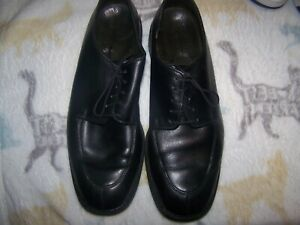

Product Title:  PARABOOT BLACK DRESS SHOES SIZE 9 MEN


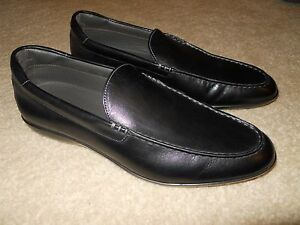

Product Title:  SANTONI MENS BLACK LEATHER LOAFER SHOES 11.5 D


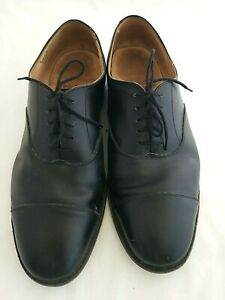

Product Title:  Tricker's Black Leather Lace-up Dress Shoes Mens 10.5


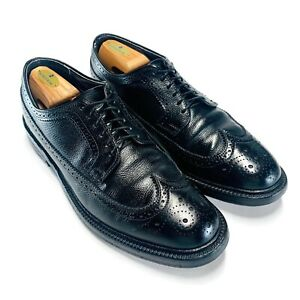

Product Title:  Vintage Hanover LB Sheppard Mens Black Wingtip Leather Dress Shoes 10 B/AA


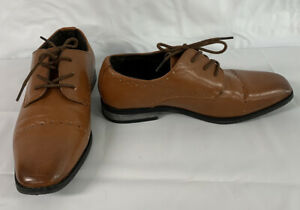

Product Title:  Todd Welsh Chucky Oxford Shoes Men's Size 5.5 Saddle Brown 


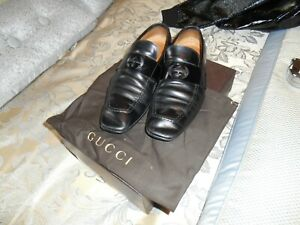

Product Title:  MEN'S GUCCI SHOES GUCCI SIZE 6 US SIZE 7 RETAIL $595 (BLACK)


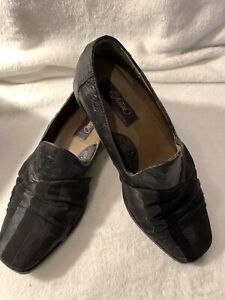

Product Title:  Fratelli Black mens dress shoes 10.5 used


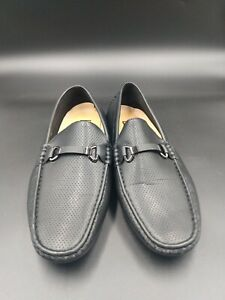

Product Title:  Faranzi shoes size 10


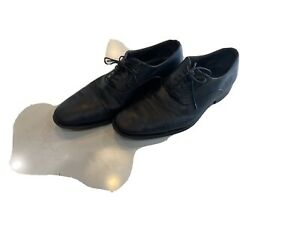

Product Title:  bruno magli mens shoes 9


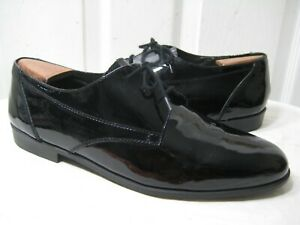

Product Title:  Stanley Blacker Couture  Black Patent Leather Shoes Men's Size 10.5 M


In [563]:
get_similar_tags('black dress shoes', 5)

In [267]:
# os.chdir('./imgs/')

# # if os.path.isdir('train/boots') is False:
# #     os.makedirs('train/boots')
# #     os.makedirs('train/casualshirt')
# #     os.makedirs('train/casualshoe')
# #     os.makedirs('train/coat')
# #     os.makedirs('train/dressshirt')
# #     os.makedirs('train/dressshoe')
# #     os.makedirs('train/jeans')
# #     os.makedirs('train/pants')
# #     os.makedirs('train/polos')
# #     os.makedirs('train/shorts')
# #     os.makedirs('train/sneakers')
# #     os.makedirs('train/suits')
# #     os.makedirs('train/sweaters')
# #     os.makedirs('train/tshirts')
    
# #     os.makedirs('valid/boots')
# #     os.makedirs('valid/casualshirt')    
# #     os.makedirs('valid/casualshoe')
# #     os.makedirs('valid/coat')
# #     os.makedirs('valid/dressshirt')
# #     os.makedirs('valid/dressshoe')
# #     os.makedirs('valid/jeans')
# #     os.makedirs('valid/pants')
# #     os.makedirs('valid/polos')
# #     os.makedirs('valid/shorts')
# #     os.makedirs('valid/sneakers')
# #     os.makedirs('valid/suits')
# #     os.makedirs('valid/sweaters')
# #     os.makedirs('valid/tshirts')

# #     os.makedirs('test/boots')
# #     os.makedirs('test/casualshirt')    
# #     os.makedirs('test/casualshoe')
# #     os.makedirs('test/coat')
# #     os.makedirs('test/dressshirt')
# #     os.makedirs('test/dressshoe')
# #     os.makedirs('test/jeans')
# #     os.makedirs('test/pants')
# #     os.makedirs('test/polos')
# #     os.makedirs('test/shorts')
# #     os.makedirs('test/sneakers')
# #     os.makedirs('test/suits')
# #     os.makedirs('test/sweaters')
# #     os.makedirs('test/tshirts')

# for i in random.sample(glob.glob('boots/*.*'), 300):
#     shutil.copy(i, 'train/boots')      
# for i in random.sample(glob.glob('casualshirt/*.*'), 300):
#     shutil.copy(i, 'train/casualshirt')
# for i in random.sample(glob.glob('casualshoe/*.*'), 300):
#     shutil.copy(i, 'train/casualshoe')      
# for i in random.sample(glob.glob('coatjacket/*.*'), 300):
#     shutil.copy(i, 'train/coat')
# for i in random.sample(glob.glob('dressshirt/*.*'), 300):
#     shutil.copy(i, 'train/dressshirt')      
# for i in random.sample(glob.glob('dressshoe/*.*'), 300):
#     shutil.copy(i, 'train/dressshoe')
# for i in random.sample(glob.glob('jeans/*.*'), 300):
#     shutil.copy(i, 'train/jeans')      
# for i in random.sample(glob.glob('pants/*.*'), 300):
#     shutil.copy(i, 'train/pants')
# for i in random.sample(glob.glob('polos/*.*'), 300):
#     shutil.copy(i, 'train/polos')      
# for i in random.sample(glob.glob('shorts/*.*'), 300):
#     shutil.copy(i, 'train/shorts')
# for i in random.sample(glob.glob('sneakers/*.*'), 300):
#     shutil.copy(i, 'train/sneakers')      
# for i in random.sample(glob.glob('suits/*.*'), 300):
#     shutil.copy(i, 'train/suits')
# for i in random.sample(glob.glob('sweaters/*.*'), 300):
#     shutil.copy(i, 'train/sweaters')      
# for i in random.sample(glob.glob('tshirts/*.*'), 300):
#     shutil.copy(i, 'train/tshirts')

# for i in random.sample(glob.glob('boots/*.*'), 50):
#     shutil.copy(i, 'valid/boots')      
# for i in random.sample(glob.glob('casualshirt/*.*'), 50):
#     shutil.copy(i, 'valid/casualshirt')
# for i in random.sample(glob.glob('casualshoe/*.*'), 50):
#     shutil.copy(i, 'valid/casualshoe')      
# for i in random.sample(glob.glob('coatjacket/*.*'), 50):
#     shutil.copy(i, 'valid/coat')
# for i in random.sample(glob.glob('dressshirt/*.*'), 50):
#     shutil.copy(i, 'valid/dressshirt')      
# for i in random.sample(glob.glob('dressshoe/*.*'), 50):
#     shutil.copy(i, 'valid/dressshoe')
# for i in random.sample(glob.glob('jeans/*.*'), 50):
#     shutil.copy(i, 'valid/jeans')      
# for i in random.sample(glob.glob('pants/*.*'), 50):
#     shutil.copy(i, 'valid/pants')
# for i in random.sample(glob.glob('polos/*.*'), 50):
#     shutil.copy(i, 'valid/polos')      
# for i in random.sample(glob.glob('shorts/*.*'), 50):
#     shutil.copy(i, 'valid/shorts')
# for i in random.sample(glob.glob('sneakers/*.*'), 50):
#     shutil.copy(i, 'valid/sneakers')      
# for i in random.sample(glob.glob('suits/*.*'), 50):
#     shutil.copy(i, 'valid/suits')
# for i in random.sample(glob.glob('sweaters/*.*'), 50):
#     shutil.copy(i, 'valid/sweaters')      
# for i in random.sample(glob.glob('tshirts/*.*'), 50):
#     shutil.copy(i, 'valid/tshirts')

# for i in random.sample(glob.glob('boots/*.*'), 10):
#     shutil.copy(i, 'test/boots')      
# for i in random.sample(glob.glob('casualshirt/*.*'), 10):
#     shutil.copy(i, 'test/casualshirt')
# for i in random.sample(glob.glob('casualshoe/*.*'), 10):
#     shutil.copy(i, 'test/casualshoe')      
# for i in random.sample(glob.glob('coatjacket/*.*'), 10):
#     shutil.copy(i, 'test/coat')
# for i in random.sample(glob.glob('dressshirt/*.*'), 10):
#     shutil.copy(i, 'test/dressshirt')      
# for i in random.sample(glob.glob('dressshoe/*.*'), 10):
#     shutil.copy(i, 'test/dressshoe')
# for i in random.sample(glob.glob('jeans/*.*'), 10):
#     shutil.copy(i, 'test/jeans')      
# for i in random.sample(glob.glob('pants/*.*'), 10):
#     shutil.copy(i, 'test/pants')
# for i in random.sample(glob.glob('polos/*.*'), 10):
#     shutil.copy(i, 'test/polos')      
# for i in random.sample(glob.glob('shorts/*.*'), 10):
#     shutil.copy(i, 'test/shorts')
# for i in random.sample(glob.glob('sneakers/*.*'), 10):
#     shutil.copy(i, 'test/sneakers')      
# for i in random.sample(glob.glob('suits/*.*'), 10):
#     shutil.copy(i, 'test/suits')
# for i in random.sample(glob.glob('sweaters/*.*'), 10):
#     shutil.copy(i, 'test/sweaters')      
# for i in random.sample(glob.glob('tshirts/*.*'), 10):
#     shutil.copy(i, 'test/tshirts')

# os.chdir('../')

In [211]:
os.getcwd()

'/home/mario/Galvanize/assignments/capstone_3'

In [171]:
# boot_data = glob.glob('imgs/boots/*.*')
# casualshirt_data = glob.glob('imgs/casualshirt/*.*')
# casualshoe_data = glob.glob('imgs/casualshoe/*.*')
# coat_data = glob.glob('imgs/coatjacket/*.*')
# dressshirt_data = glob.glob('imgs/dressshirt/*.*')
# dressshoe_data = glob.glob('imgs/dressshoe/*.*')
# jeans_data = glob.glob('imgs/jeans/*.*')
# pants_data = glob.glob('imgs/pants/*.*')
# polos_data = glob.glob('imgs/polos/*.*')
# shorts_data = glob.glob('imgs/shorts/*.*')
# sneakers_data = glob.glob('imgs/sneakers/*.*')
# suits_data = glob.glob('imgs/suits/*.*')
# sweaters_data = glob.glob('imgs/sweaters/*.*')
# tshirt_data = glob.glob('imgs/tshirts/*.*')


# data = []
# labels = []

# for i in boot_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
#     target_size= (224,224))
#     image=np.array(image)
#     data.append(image)
#     labels.append(0)




In [172]:
# for i in casualshirt_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
#     target_size= (224,224))
#     image=np.array(image)
#     data.append(image)
#     labels.append(1)

In [173]:
# for i in casualshoe_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (200,200))
#     target_size= (224,224))
#     image=np.array(image)
#     data.append(image)
#     labels.append(2)

In [174]:
# for i in coat_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (200,200))
#     target_size= (224,224))                                                
#     image=np.array(image)
#     data.append(image)
#     labels.append(3)

In [175]:
# for i in dressshirt_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (200,200))
#     target_size= (224,224))                                                
#     image=np.array(image)
#     data.append(image)
#     labels.append(4)

In [176]:
# for i in dressshoe_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (200,200))
#     target_size= (224,224))                                                
#     image=np.array(image)
#     data.append(image)
#     labels.append(5)

In [177]:
# for i in jeans_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (200,200))
#     target_size= (224,224))                                                
#     image=np.array(image)
#     data.append(image)
#     labels.append(6)

In [178]:
# for i in pants_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (200,200))
#     target_size= (224,224))                                                
#     image=np.array(image)
#     data.append(image)
#     labels.append(7)

In [179]:
# for i in polos_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (200,200))
#     target_size= (224,224))                                                
#     image=np.array(image)
#     data.append(image)
#     labels.append(8)

In [180]:
# for i in shorts_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (200,200))
#     target_size= (224,224))                                                
#     image=np.array(image)
#     data.append(image)
#     labels.append(9)

In [181]:
# for i in sneakers_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (200,200))
#     target_size= (224,224))                                                
#     image=np.array(image)
#     data.append(image)
#     labels.append(10)

In [182]:
# for i in suits_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (200,200))
#     target_size= (224,224))                                                
#     image=np.array(image)
#     data.append(image)
#     labels.append(11)

In [183]:
# for i in sweaters_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (300,300))
#     target_size= (224,224))                                                
#     image=np.array(image)
#     data.append(image)
#     labels.append(12)

In [184]:
# for i in tshirt_data[:1000]:   
#     image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
# #     target_size= (300,300))
#     target_size= (224,224))                                                
#     image=np.array(image)
#     data.append(image)
#     labels.append(13)

In [3]:
train_path = 'imgs/train'
valid_path = 'imgs/valid'
test_path = 'imgs/test'

In [4]:
# train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
#     .flow_from_directory(directory=train_path, target_size=(224,224), classes=['boots', 'casualshirt', 'casualshoe', 'coat', 'dressshirt', 'dressshoe', 'jeans', 'pants', 'polos', 'shorts', 'sneakers', 'suits', 'sweaters', 'tshirts'], batch_size=10)
# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
#     .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['boots', 'casualshirt', 'casualshoe', 'coat', 'dressshirt', 'dressshoe', 'jeans', 'pants', 'polos', 'shorts', 'sneakers', 'suits', 'sweaters', 'tshirts'], batch_size=10)
# test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
#     .flow_from_directory(directory=test_path, target_size=(224,224), classes=['boots', 'casualshirt', 'casualshoe', 'coat', 'dressshirt', 'dressshoe', 'jeans', 'pants', 'polos', 'shorts', 'sneakers', 'suits', 'sweaters', 'tshirts'], batch_size=10, shuffle=False)


train_batches = ImageDataGenerator(rescale= 1. / 255, preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(rescale= 1. / 255, preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(rescale= 1. / 255, preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 4200 images belonging to 14 classes.
Found 700 images belonging to 14 classes.
Found 140 images belonging to 14 classes.


In [270]:
len(train_batches), len(valid_batches)

(420, 70)

In [187]:
# imgs, labels = next(train_batches)

In [188]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# plotImages(imgs)
# print(labels)

In [189]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
#     tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
#     tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
#     tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=14, activation='softmax')
# ])

# model.summary()

In [190]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [191]:
# model.fit(x=train_batches,
#     steps_per_epoch=len(train_batches),
#     validation_data=valid_batches,
#     validation_steps=len(valid_batches),
#     epochs=10,
#     verbose=2
# )

In [192]:
# data = np.array(data)
# labels = np.array(labels)

In [193]:
# X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
#                                                 random_state=42)

In [194]:
# datagen = ImageDataGenerator(rescale=1.0/255.0)

In [195]:
# train_iterator = datagen.flow(X_train, ytrain, batch_size=64)
# test_iterator = datagen.flow(X_test, ytest, batch_size=64)
# print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))

In [196]:
# batchX, batchy = train_iterator.next()
# print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [484]:
model = applications.ResNet50(weights='imagenet')

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# model.add(Dense(units=2, activation='softmax'))

In [238]:
def prepare_image(file):
    img_path = '../../../Desktop/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.resnet.preprocess_input(img_array_expanded_dims)

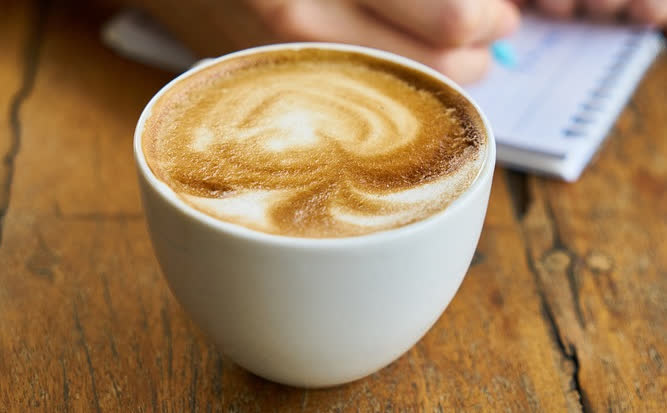

In [239]:
Image(filename='../../../Desktop/espresso.jpg', width=300,height=200)

In [240]:
preprocessed_image = prepare_image('espresso.jpg')
predictions = model.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)

In [241]:
results

[[('n07920052', 'espresso', 0.9682349),
  ('n07932039', 'eggnog', 0.015595335),
  ('n07930864', 'cup', 0.008620911),
  ('n03063599', 'coffee_mug', 0.005635306),
  ('n02823750', 'beer_glass', 0.00076643185)]]

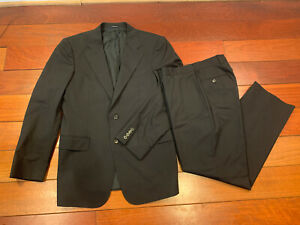

In [485]:
Image(filename='../../../Desktop/suit.jpg', width=300,height=200)

In [486]:
preprocessed_image = prepare_image('suit.jpg')
predictions = model.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04350905', 'suit', 0.504865),
  ('n04479046', 'trench_coat', 0.15234388),
  ('n02669723', 'academic_gown', 0.057798017),
  ('n03787032', 'mortarboard', 0.056015324),
  ('n02667093', 'abaya', 0.048213888)]]

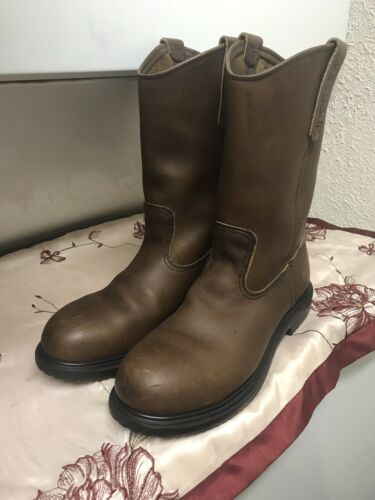

In [248]:
Image(filename='../../../Desktop/s-l500.jpg', width=300,height=200)

In [249]:
preprocessed_image = prepare_image('s-l500.jpg')
predictions = model.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03124043', 'cowboy_boot', 0.9986467),
  ('n04200800', 'shoe_shop', 0.0012373524),
  ('n03680355', 'Loafer', 3.8518257e-05),
  ('n04254777', 'sock', 2.7252545e-05),
  ('n02077923', 'sea_lion', 1.866617e-05)]]

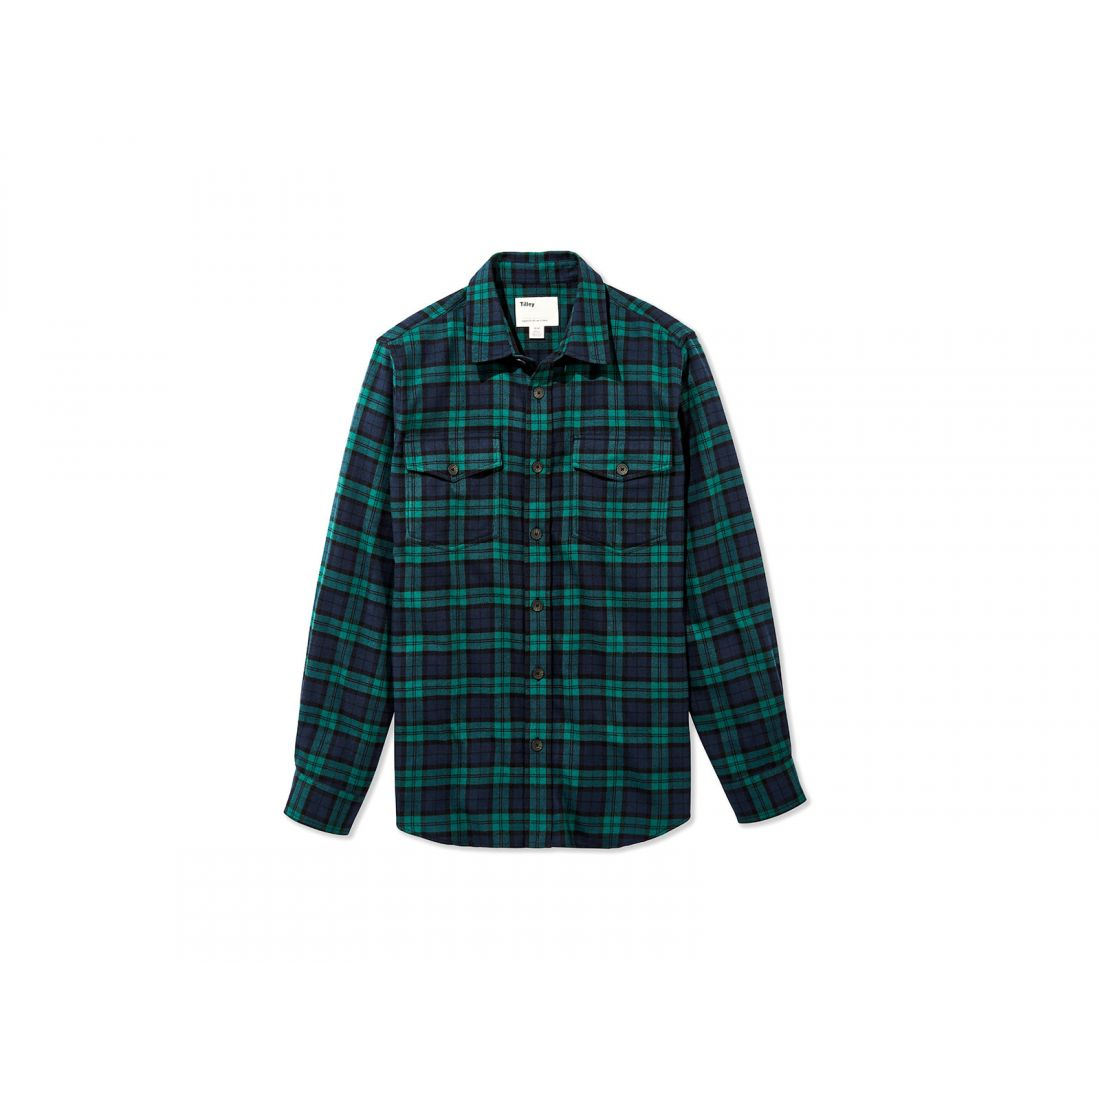

In [250]:
Image(filename='../../../Desktop/green_plaid.jpg', width=300,height=200)

In [251]:
preprocessed_image = prepare_image('green_plaid.jpg')
predictions = model.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04370456', 'sweatshirt', 0.16281821),
  ('n04599235', 'wool', 0.097734675),
  ('n04479046', 'trench_coat', 0.07586828),
  ('n03045698', 'cloak', 0.06252091),
  ('n04371430', 'swimming_trunks', 0.055158827)]]

In [319]:
applications.ResNet50(include_top=False).summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
model = applications.ResNet50(weights='imagenet')

In [7]:
x = model.layers[-2].output

output = Dense(units=14, activation='softmax')(x)

model = Model(inputs=model.input, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [315]:
for layer in model.layers[:-35]:
    layer.trainable = False

In [316]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=1
)

Epoch 1/30
420/420 [==============================] - 57s 136ms/step - loss: 1.1349 - accuracy: 0.6243 - val_loss: 2.6934 - val_accuracy: 0.1271
Epoch 2/30
420/420 [==============================] - 57s 135ms/step - loss: 0.4563 - accuracy: 0.8469 - val_loss: 1.2019 - val_accuracy: 0.6486
Epoch 3/30
420/420 [==============================] - 58s 139ms/step - loss: 0.2363 - accuracy: 0.9221 - val_loss: 0.7111 - val_accuracy: 0.8186
Epoch 4/30
420/420 [==============================] - 56s 134ms/step - loss: 0.1587 - accuracy: 0.9495 - val_loss: 0.8257 - val_accuracy: 0.8114
Epoch 5/30
420/420 [==============================] - 57s 135ms/step - loss: 0.1606 - accuracy: 0.9481 - val_loss: 0.7451 - val_accuracy: 0.8371
Epoch 6/30
420/420 [==============================] - 57s 135ms/step - loss: 0.0873 - accuracy: 0.9729 - val_loss: 0.7480 - val_accuracy: 0.8414
Epoch 7/30
420/420 [==============================] - 57s 135ms/step - loss: 0.1081 - accuracy: 0.9667 - val_loss: 1.0831 - val_ac

In [10]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)

14/14 [==============================] - 1s 36ms/step


In [11]:
test_labels = test_batches.classes

In [12]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [13]:
test_batches.class_indices

{'boots': 0,
 'casualshirt': 1,
 'casualshoe': 2,
 'coat': 3,
 'dressshirt': 4,
 'dressshoe': 5,
 'jeans': 6,
 'pants': 7,
 'polos': 8,
 'shorts': 9,
 'sneakers': 10,
 'suits': 11,
 'sweaters': 12,
 'tshirts': 13}

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  2  0  0  0  1  0  0  1  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  1  0  0]
 [ 1  0  0  0  9  0  0  0  0  0  0  0  0  0]
 [ 1  0  2  0  0  7  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  7  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  7  1  0  0  1  0]
 [ 0  0  1  0  1  0  1  0  0  7  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  1  0  0  0  0  0  1  0  1  6  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10]]


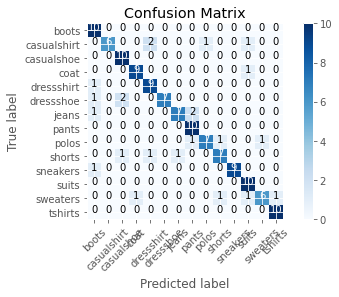

In [15]:
cm_plot_labels = ['boots',
                'casualshirt',
                'casualshoe',
                'coat',
                'dressshirt',
                'dressshoe',
                'jeans',
                'pants',
                'polos',
                'shorts',
                'sneakers',
                'suits',
                'sweaters',
                'tshirts']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [329]:
weights = model.get_weights()

names = [weight.name for layer in model.layers for weight in layer.weights]

for name, weight in zip(names, weights):
    print(name, weight.shape)

conv1_conv_9/kernel:0 (7, 7, 3, 64)
conv1_conv_9/bias:0 (64,)
conv1_bn_9/gamma:0 (64,)
conv1_bn_9/beta:0 (64,)
conv1_bn_9/moving_mean:0 (64,)
conv1_bn_9/moving_variance:0 (64,)
conv2_block1_1_conv_9/kernel:0 (1, 1, 64, 64)
conv2_block1_1_conv_9/bias:0 (64,)
conv2_block1_1_bn_9/gamma:0 (64,)
conv2_block1_1_bn_9/beta:0 (64,)
conv2_block1_1_bn_9/moving_mean:0 (64,)
conv2_block1_1_bn_9/moving_variance:0 (64,)
conv2_block1_2_conv_9/kernel:0 (3, 3, 64, 64)
conv2_block1_2_conv_9/bias:0 (64,)
conv2_block1_2_bn_9/gamma:0 (64,)
conv2_block1_2_bn_9/beta:0 (64,)
conv2_block1_2_bn_9/moving_mean:0 (64,)
conv2_block1_2_bn_9/moving_variance:0 (64,)
conv2_block1_0_conv_9/kernel:0 (1, 1, 64, 256)
conv2_block1_0_conv_9/bias:0 (256,)
conv2_block1_3_conv_9/kernel:0 (1, 1, 64, 256)
conv2_block1_3_conv_9/bias:0 (256,)
conv2_block1_0_bn_9/gamma:0 (256,)
conv2_block1_0_bn_9/beta:0 (256,)
conv2_block1_0_bn_9/moving_mean:0 (256,)
conv2_block1_0_bn_9/moving_variance:0 (256,)
conv2_block1_3_bn_9/gamma:0 (256,)
con

In [335]:
model.layers[-3]

In [20]:
full_path = 'imgs/'

In [29]:
train_path = 'imgs/train'
valid_path = 'imgs/valid'
test_path = 'imgs/test'

In [17]:
model.save('retrainresnet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: retrainresnet/assets


In [18]:
reconstructed_model = keras.models.load_model('retrainresnet')

reconstructed_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [559]:
pred = reconstructed_model.predict(transformed, batch_size=1, verbose=1)

1/1 [==============================] - 0s 809us/step


In [560]:
np.round(pred)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

In [561]:
test_batches.class_indices

{'boots': 0,
 'casualshirt': 1,
 'casualshoe': 2,
 'coat': 3,
 'dressshirt': 4,
 'dressshoe': 5,
 'jeans': 6,
 'pants': 7,
 'polos': 8,
 'shorts': 9,
 'sneakers': 10,
 'suits': 11,
 'sweaters': 12,
 'tshirts': 13}

In [353]:
new_model = Model(reconstructed_model.inputs, reconstructed_model.layers[-2].output)

new_model.summary()



Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [72]:
train_batches = ImageDataGenerator(rescale= 1. / 255, preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['boots', 'casualshirt', 'casualshoe', 'coat', 'dressshirt', 'dressshoe', 'jeans', 'pants', 'polos', 'shorts', 'sneakers', 'suits', 'sweaters', 'tshirts'], batch_size=batch_size)
valid_batches = ImageDataGenerator(rescale= 1. / 255, preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['boots', 'casualshirt', 'casualshoe', 'coat', 'dressshirt', 'dressshoe', 'jeans', 'pants', 'polos', 'shorts', 'sneakers', 'suits', 'sweaters', 'tshirts'], batch_size=batch_size)
test_batches = ImageDataGenerator(rescale= 1. / 255, preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['boots', 'casualshirt', 'casualshoe', 'coat', 'dressshirt', 'dressshoe', 'jeans', 'pants', 'polos', 'shorts', 'sneakers', 'suits', 'sweaters', 'tshirts'], batch_size=batch_size, shuffle=False)

Found 4200 images belonging to 14 classes.
Found 700 images belonging to 14 classes.
Found 140 images belonging to 14 classes.


In [45]:
# train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
#     directory=train_path, target_size=(224,224), batch_size=10)
# valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
#     directory=valid_path, target_size=(224,224), batch_size=10)
# test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
#     directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 4200 images belonging to 14 classes.
Found 700 images belonging to 14 classes.
Found 140 images belonging to 14 classes.


In [170]:
# for i in train_batches:
#     print(i)
#     break

In [67]:
# mobile = tf.keras.applications.ResNet50(input_shape=(224, 224, 3),include_top=False, weights='imagenet')

# mobile.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [22]:
batch_size = 42

In [24]:
full_batches = ImageDataGenerator(rescale= 1. / 255, preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
    .flow_from_directory(directory=full_path, target_size=(224,224), batch_size=batch_size, shuffle=False)

Found 10542 images belonging to 14 classes.


In [69]:
len(train_batches.filenames)

4200

In [26]:
img_width, img_height = 224, 224

#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
# train_data_dir = "./imgs/fashion_data/Footwear/Men/Images/"

# train_data_dir = full_path full_path steps = 4375

# nb_train_samples = 140000


def extract_features():
    Itemcodes = []
    
#     model = tf.keras.applications.ResNet50(input_shape=(224, 224, 3),include_top=False, weights='imagenet')
#     model = applications.ResNet50(include_top=False, weights='imagenet')
#     model = applications.mobilenet.MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

#     seq_model = keras.Sequential([model,keras.layers.GlobalAveragePooling2D()])
    
    reconstructed_model = keras.models.load_model('retrainresnet')
    
    new_model = Model(reconstructed_model.inputs, reconstructed_model.layers[-2].output)

#     generator = datagen.flow_from_directory(
#         train_data_dir,
#         target_size=(img_width, img_height),
#         batch_size=batch_size,
#         class_mode=None,
#         shuffle=False)
    generator = full_batches
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("/")+1):i.find(".")])
    extracted_features = new_model.predict(generator, steps=251, verbose=1)
#     extracted_features = extracted_features.reshape((-1, 100352))
    
    np.save(open('./imgs/resnet_features.npy', 'wb'), extracted_features)
    np.save(open('./imgs/resnet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))
    
    return extracted_features
    
a = datetime.now()
x = extract_features()
print("Time taken in feature extraction", datetime.now()-a)

251/251 [==============================] - 34s 134ms/step
Time taken in feature extraction 0:00:46.276236


In [174]:
# seq_model.summary()

In [175]:
# model = applications.ResNet50(include_top=False, weights='imagenet')

# seq_model = keras.Sequential([model,keras.layers.GlobalAveragePooling2D()])

# seq_model.summary()

# x = seq_model.predict(train_batches, steps=(7000//32)+1, verbose=1)

In [27]:
x.shape

(10542, 2048)

In [31]:
extracted_features = np.load('./imgs/resnet_features.npy')
Productids = np.load('./imgs/resnet_feature_product_ids.npy')

# men = pd.read_csv('./footwear_men.csv')
df_Productids = list(mens['ProductId'])
Productids = list(Productids)

In [32]:
type(extracted_features),extracted_features.shape

(numpy.ndarray, (10542, 2048))

In [33]:
extracted_features[1].shape

(2048,)

In [34]:
type(Productids), len(Productids)

(list, 10542)

In [35]:
Productids

['0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '

==================== input product image ====================


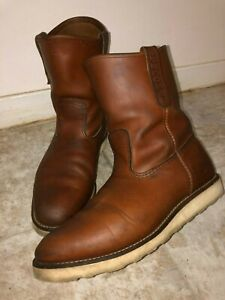

Product Title:  Red Wing 866 Pecos Pull On Work Boots 9 2nds https://i.ebayimg.com/images/g/SBoAAOSwhHZf5Cef/s-l300.jpg

 ==================== Recommended products ====================


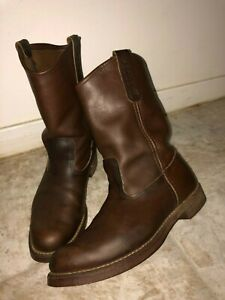

Product Title:  Red Wing 1178 Pecos Pull On Nailseat Western Work Boots 9 


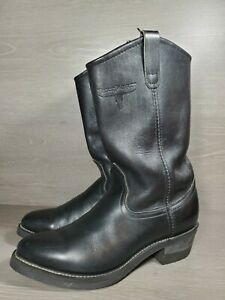

Product Title:  MASON WESTERN Leather Pull On Vibram Sole Cowboy Motorcycle Boots 8.5 (E) (c3


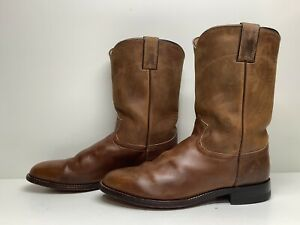

Product Title:  VTG MENS JUSTIN WESTERN ROPER BROWN BOOTS SIZE 8.5 EE


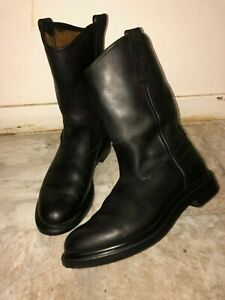

Product Title:  Red Wing 1105 Pecos Black Supersole Pull On Work Boots 9 2nds
[334 445 173 383 525]


In [150]:
def get_similar_products_cnn(product_id, num_results):
    doc_id = Productids.index(product_id)
    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    print("="*20, "input product image", "="*20)
    ip_row = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[0]])]
    #print(ip_row.head())
    for indx, row in ip_row.iterrows():
        display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
        print('Product Title: ', row['title'], row['image_link'])
    print("\n","="*20, "Recommended products", "="*20)
    for i in range(1,len(indices)):
        rows = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[i]])]
        for indx, row in rows.iterrows():
            display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
            print('Product Title: ', row['title'])
#             print('Euclidean Distance from input image:', pdists[i])
    print(indices)

get_similar_products_cnn('4', 5)

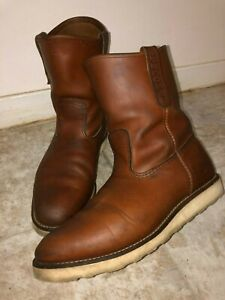

Product Title:  Red Wing 866 Pecos Pull On Work Boots 9 2nds
[334 445 173 383 525 369  62  76 353 302]

 ==================== Recommended products ====================


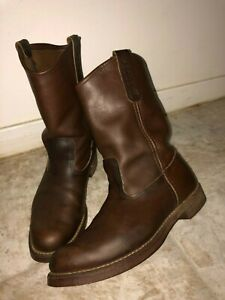

In [ ]:
def get_similar(product_id, num_results, words=None):
    doc_id = Productids.index(product_id)
    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
    
    display(Image(url=mens['image_link'].iloc[int(product_id)], width = 224, height = 224,embed=True))
    
    print('Product Title: ', mens['title'].iloc[int(product_id)])
    
    if words:
        
        indices = np.argsort(pairwise_dist.flatten())[0:num_results+100]
        
        print(indices)
        
        df_ind = []

        for i in indices:
            df_ind.append(int(Productids[i]))
        
#         temp = mens.iloc[df_ind]
        
        tfidf = TfidfVectorizer(lowercase=True, tokenizer=None,
                             analyzer='word', max_features=1000)
        
#         comp_tfidf = tfidf.fit_transform(mens['tags'])
        
        queryTFIDF = tfidf.fit(mens['tags'])
        queryTFIDF = queryTFIDF.transform([words])
        
        cosine_similarities = cosine_similarity(queryTFIDF, document_tfidf_matrix).flatten()
        
        indices = cosine_similarities.argsort()[:-num_results:-1]
        
        print(indices)
        
        print("\n","="*20, "Recommended products", "="*20)

        for i in range(1,len(indices)):
            rows = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[i]])]
            for indx, row in rows.iterrows():
                display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
                print('Product Title: ', row['title'])
    
    else:
        indices = np.argsort(pairwise_dist.flatten())[0:num_results]
        
        print(indices)
        
        print("\n","="*20, "Recommended products", "="*20)
    
        for i in range(1,len(indices)):
            rows = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[i]])]
            for indx, row in rows.iterrows():
                display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
                print('Product Title: ', row['title'])
        



get_similar('4', 10)

In [25]:
def get_similar_tags(words, num_results):
    tfidf = TfidfVectorizer(lowercase=True, tokenizer=None,
                             analyzer='word', max_features=1000)
    queryTFIDF = tfidf.fit(mens['tags'])
    queryTFIDF = queryTFIDF.transform([words])
    cosine_similarities = cosine_similarity(queryTFIDF, document_tfidf_matrix).flatten()
    related_product_indices = cosine_similarities.argsort()[:-11:-1]

    
    print("\n","="*20, "Recommended products", "="*20)
    
    rows = mens[['image_link','title']].iloc[related_product_indices]
    for indx, row in rows.iterrows():
        display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
        print('Product Title: ', row['title'])

get_similar_tags('ralph lauren plaid shirt', 10)

NameError: name 'document_tfidf_matrix' is not defined

In [431]:
extracted_features

numpy.ndarray

In [436]:
doc_id = Productids.index('444')

print(doc_id)

pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))

indices = np.argsort(pairwise_dist.flatten())[0:10]

print(indices)

df_ind = []

for i in indices:
    df_ind.append(int(Productids[i]))

df_ind

1001
[1001 1488  450 2374  402  718  806 1165  977  427]


[444, 931, 1160, 2374, 1112, 1428, 1516, 608, 420, 1137]

In [380]:
mens.iloc[df_ind]

,index,title,price,currency,attributes,image_link,listing_link,category,ProductId,tags
444,1682,Scully Republican Western Shirt,25.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/UB0AAOSwIFBf41R...,https://www.ebay.com/itm/Scully-Republican-Wes...,casual shirt,444,pre-owned republican long m window see type co...
931,13214,Tommy Bahama Button Front Shirt Men's Large L ...,14.99,US,casual shirt,https://i.ebayimg.com/images/g/txQAAOSwhRZed5e...,https://www.ebay.com/itm/Tommy-Bahama-Button-F...,casual shirt,931,multi-color l tommy men large sleeve button lo...
1160,18192,Metropolitan View Vintage Mens Button Down Shi...,24.71,US,casual shirt,https://i.ebayimg.com/images/g/H3cAAOSwmLVc8s1...,https://www.ebay.com/itm/Metropolitan-View-Vin...,casual shirt,1160,view vintage mens button colorful casual down ...
2374,603,Vintage Pendleton Gray Full Zip Lined 100% Woo...,89.00,US,coat,https://i.ebayimg.com/images/g/3SAAAOSwhlBf2lE...,https://www.ebay.com/itm/Vintage-Pendleton-Gra...,coat,2374,gray men vintage medium 100 jacket made usa zi...
1112,16614,World Island Mens XL Red Striped Shirt 100% Co...,29.99,US,casual shirt,https://i.ebayimg.com/images/g/9BsAAOSw~AVYu4x...,https://www.ebay.com/itm/World-Island-Mens-XL-...,casual shirt,1112,world mens cotton red 100 casual xl island str...
1428,23951,LL Bean Flannel Lined Canvas Work Shirt Men's ...,40.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/eVMAAOSw4z5f1DG...,https://www.ebay.com/itm/LL-Bean-Flannel-Lined...,casual shirt,1428,fit men pre-owned long window see tan button-u...
1516,26303,Ralph Lauren Button Up Shirt Adult Large Blue ...,16.00,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/TksAAOSw~~Rf45M...,https://www.ebay.com/itm/Ralph-Lauren-Button-U...,casual shirt,1516,fit men large pre-owned long window see button...
608,5940,Peter Millar mens Summer Comfort Purple Green ...,27.71,US,casual shirt,https://i.ebayimg.com/images/g/MTYAAOSwC0dbwLN...,https://www.ebay.com/itm/Peter-Millar-mens-Sum...,casual shirt,608,green millar golf mens spellout peter summer m...
420,1025,"Polo By Ralph Lauren Sea Blue LS Linen Shirt, M",32.33,US,{'Condition:': 'Pre-owned:An item that has bee...,https://i.ebayimg.com/images/g/JN4AAOSwjMFfq~X...,https://www.ebay.com/itm/Polo-By-Ralph-Lauren-...,casual shirt,420,pre-owned by long window m ls see type color r...
1137,17366,Vineyard Vines Tucker Shirt Button Down Long S...,24.95,US,casual shirt,https://i.ebayimg.com/images/g/2UYAAOSwHBhf4lx...,https://www.ebay.com/itm/Vineyard-Vines-Tucker...,casual shirt,1137,vines sleeve large vineyard button long blue w...


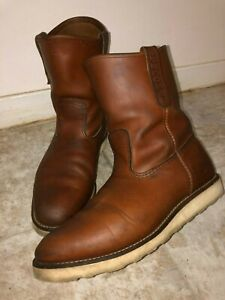

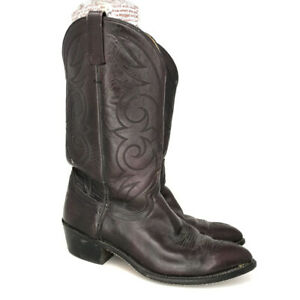

Product Title:  Acme Circle A Mens 16106 Brown Leather Cowboy Western Boots Pull On Size 11 EW
224


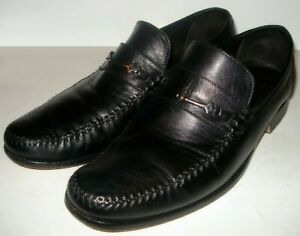

Product Title:  Bruno Magli Pittore Mens US 10 M Moc Toe Horsebit Loafer Made in ITALY msrp $199
1651


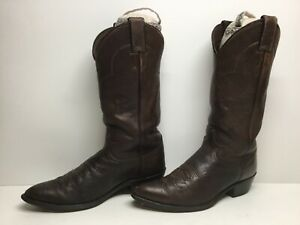

Product Title:  VTG MENS JUSTIN COWBOY BROWN BOOTS SIZE 7 D
62


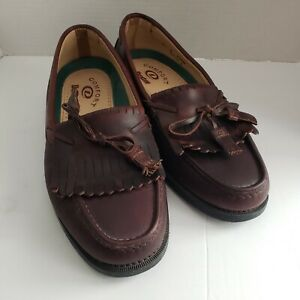

Product Title:  Comfort Dexter Brown Shoes Loafers Tassle Men's Size 11 
3445


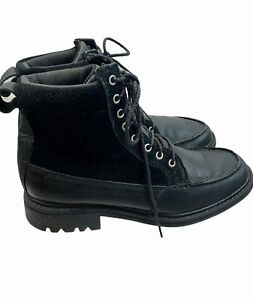

Product Title:  TImberland Mens Earthkeepers Leather and Suede Lace up Ankle Boots Size 7M
99


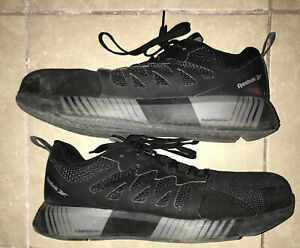

Product Title:  Reebok FUSION FLEXWEAVE-COMP
246


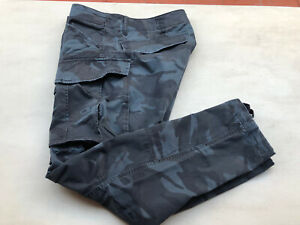

Product Title:  G-Star Raw Rovic 3D Tapered Blue Camouflage Cargo Pants Actual 38x30 Label 36x30
4391


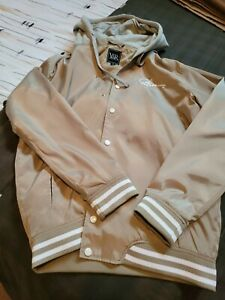

Product Title:  Mens jackets medium
2260


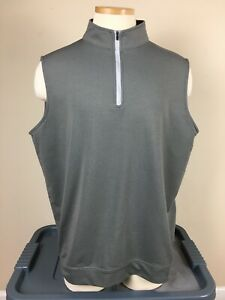

Product Title:  Peter Millar Crown Sport Gray 1/4 Zip Golf Sweater Vest Men’s Size L
7385


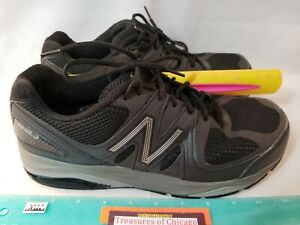

Product Title:  New Balance M1540 V2 Roll Bar Running Shoe Size 9 or 10 Men's Used Good USA Made
5701


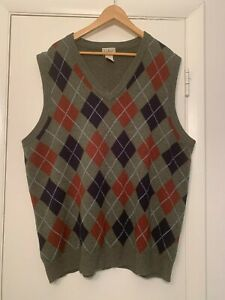

Product Title:  LL Bean Med Mens 100% Lambs Wool Pullover Green Argyle Sweater Sz XXL regular
6641


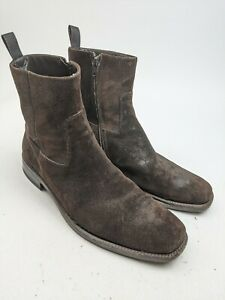

Product Title:  To Boot New York Brown Suede Side Zip Ankle Boots Sz 9.5 
64


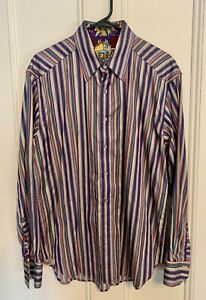

Product Title:  Robert Graham Cotton Stripe Button Down Shirt W Embroidered Contrast Trim Lg
507


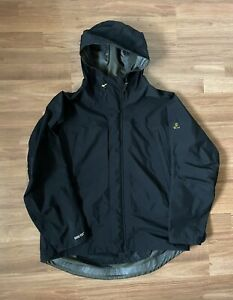

Product Title:  Polo Sport Ralph Lauren Gore-Tex Full Zip Black Anorak Parka Jacket Size Large
2316


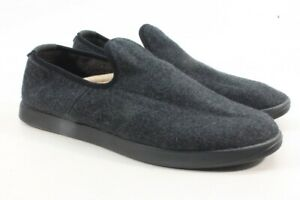

Product Title:  Allbirds Men's Wool Loungers Natural Black Comfort Shoes FLSAMP
2880


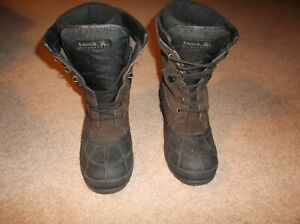

Product Title:  Kamik Nation Plus Thinsulate waterproof winter snow hunting Boots 8.5
173


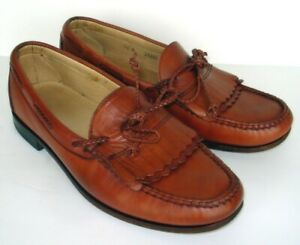

Product Title:  Allen Edmonds Woodstock US 12 D Mens Moc Toe Kiltie Loafer EU 46 Made in the USA
1654


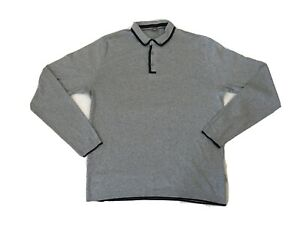

Product Title:  Men’s TED BAKER London  Gray Long Sleeve Collard Cotton Polo Shirt - Size 4
5095


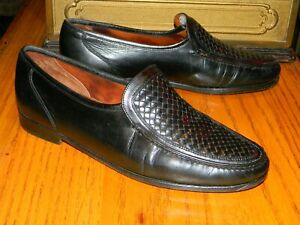

Product Title:  ALLEN EDMONDS Salerno Black Woven Leather Loafer Shoes 11.5B Great Condition!
3320


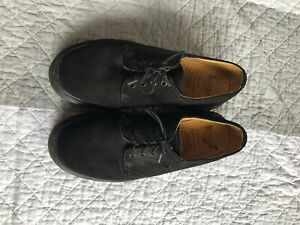

Product Title:  Used Dr. Martens Air Wair Black Suede 1561/59 Oxford Shoe UK 5 Men 6 Women 7
1770


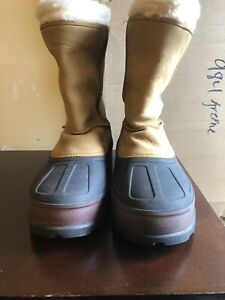

Product Title:  UGG MEN’S LEATHER BOOTS WITH WOOL LINER S/N 3255 SIZE 12
269


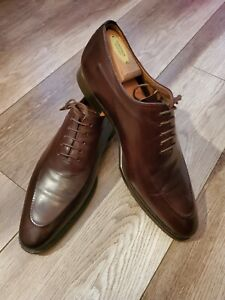

Product Title:  Mezlan Wholecut Dark Brown 10 1/2M 
3276


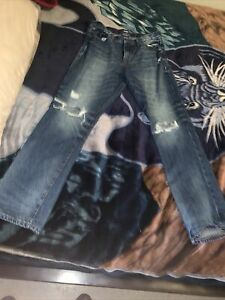

Product Title:  aeropostale jeans slim straight 29x30
4080


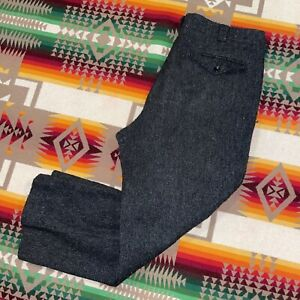

Product Title:  WOOLRICH HEAVY TWEED 36x27 Herringbone Work Wear Pants Gray Vintage USA Made
4374


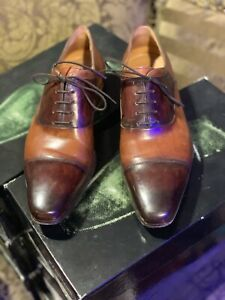

Product Title:  Magnanni Patina Oxford
3070


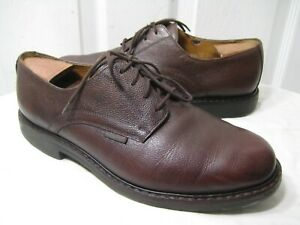

Product Title:  Mephisto Marlon Brown Leather Lace-Up Oxford Shoes Men's Size 10.5
3227


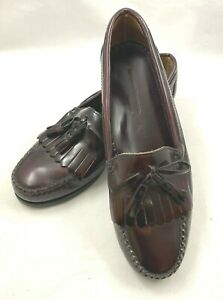

Product Title:  Sherman Brothers Philadelphia Cordovan Kiltie Tassle Loafers 11M
3189


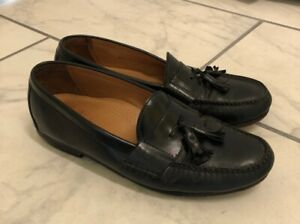

Product Title:  Cole Haan Black Loafers Leather W/ Tassels CO6587 Size 11 M GOOD CONDITION!!
3187


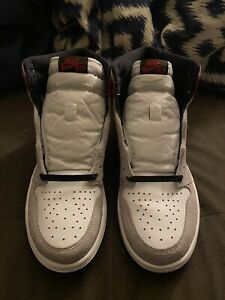

Product Title:  Jordan: Smoke-Grey 1s. [9.5]
5958


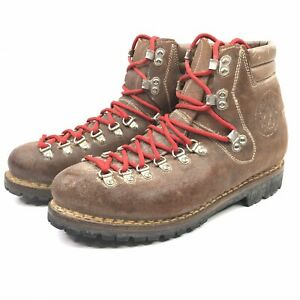

Product Title:  Men's Stellina Hiking Hunting Stomper Vintage Boots Leather Size 9 Italy
211


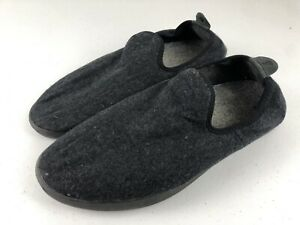

Product Title:  Allbirds Men's Slip On Wool Lounger Shoes US Size 12 Dark Gray
1667


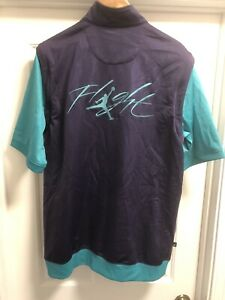

Product Title:  Nike Air Jordan Flight Retro 5 Grape Zip Up Sweater Size L
6672


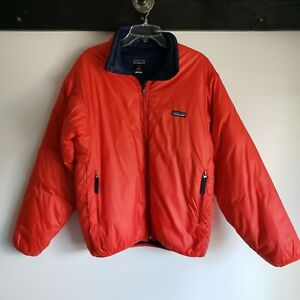

Product Title:  Patagonia Vintage 90's Nylon Coat Men's Size M Red Blue
2330


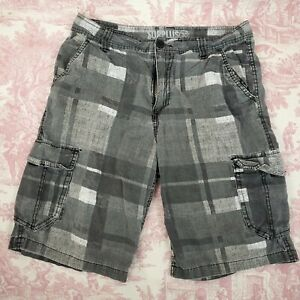

Product Title:  Surplus 30 Cargo Shorts Gray Plaid Lightweight 
5470


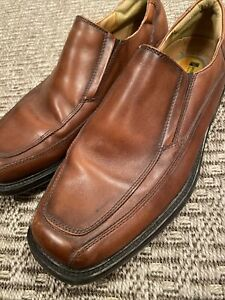

Product Title:  DOCKERS PRO STYLE MENS LOAFERS BROWN LEATHER SHOES SIZE 9.5 M
3186


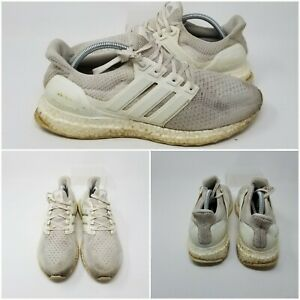

Product Title:  Adidas Ultra Boost 2.0 Tripple White Athletic Running Shoes Sneaker Mens Size 10
5564


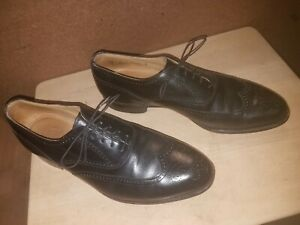

Product Title:  Johnston Murphy Aristocraft Wingtips 11 D Black MADE IN USA
2961


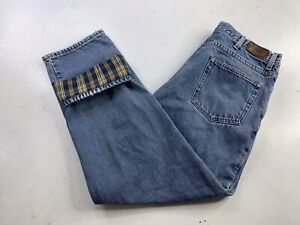

Product Title:  LL Bean Men's Flannel Lined Relaxed Fit Medium Wash Blue Denim Jeans Size 34x30
4112


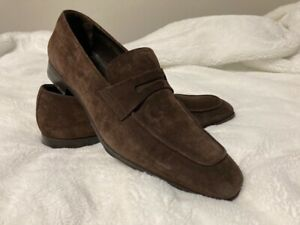

Product Title:  Prada Men's "2DB185" Brown Suede Leather Loafers Slip On Shoes Sz 8.5
3073


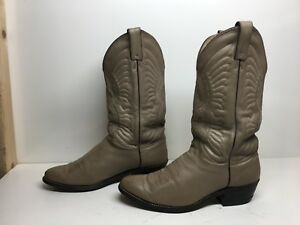

Product Title:  VTG MENS SILVERADO COWBOY SAND BOOTS SIZE 9 D
157


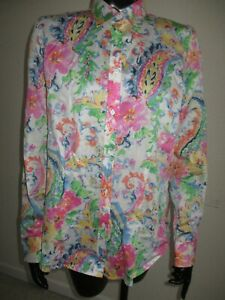

Product Title:  Ralph Lauren Slim Fit Size 12 Button Down Shirt Women
1210


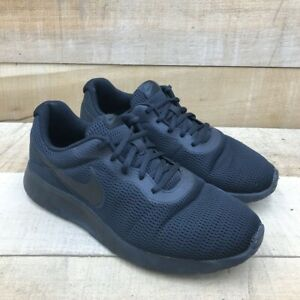

Product Title:  Nike Mens Tanjun Athletic Shoes Black AQ3555-002 Lace Up Low Top Mesh 9.5 M
5915


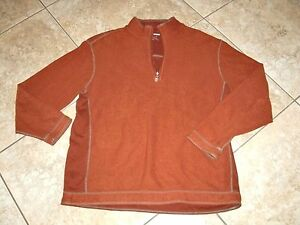

Product Title:  "TOMMY BAHAMA"Red Brick Mock-neck Logo Zip Pull Multi Blends Sweater size L
7184


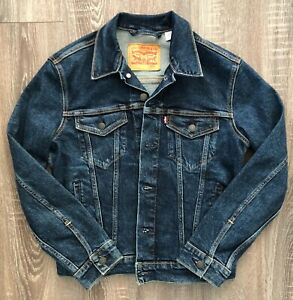

Product Title:  Levi Strauss Sz S Men's Denim Trucker Jean Jacket
2393


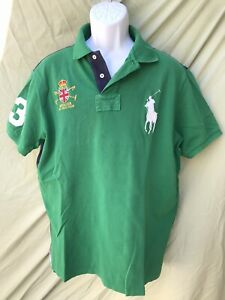

Product Title:  Polo Ralph Lauren Green Blue Custom Fit Shirt Big White Pony 3 Mercer Team XL
4871


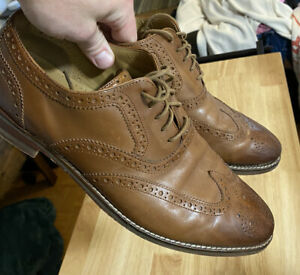

Product Title:  Cole Haan Mens Dress Shoes Cognac Brown Wingtip Oxfords (Size 10)
3074


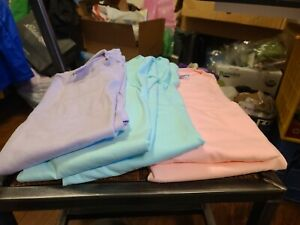

Product Title:  Hanes Beefy T Single Stitch T Shirts Lot of 5 XL Pastels 
7536


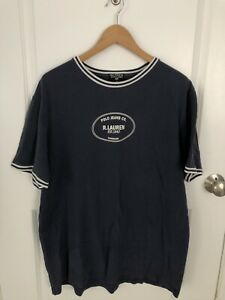

Product Title:  Polo Ralph Lauren Men’s Shirt Vintage Size Extra Large
384


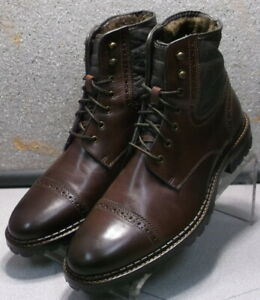

Product Title:  591362 PFBT50 Men's Shoes Size 9 M Brown Leather Lace Up Boots Johnston & Murphy
3352


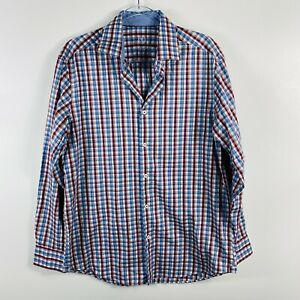

Product Title:  Bugatchi Uomo Size 16.5 Red White Blue Plaid Button Shirt Long Sleeve Casual
1316


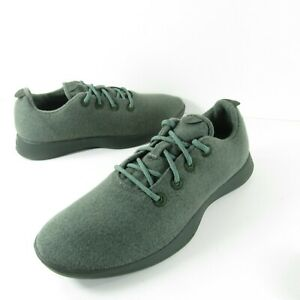

Product Title:  Allbirds Men's Wool Runners Green Running Shoes Size 12
5719


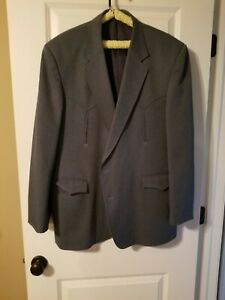

Product Title:  Western Style Bluish Grey Circle S Blazer
6318


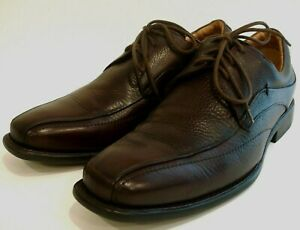

Product Title:  Johnston & Murphy FLEX US Mens Sheepskin 10.5 W Oxfords EUR 44 Shoes BRAZIL
1657


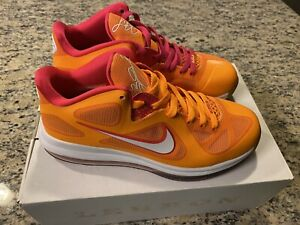

Product Title:  Lebron IX 9 Low Floridian
5618


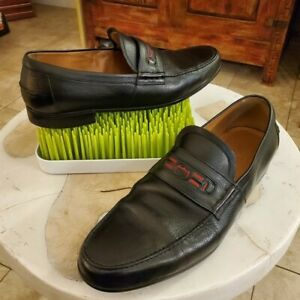

Product Title:  Men Gucci Loafers 13
3202


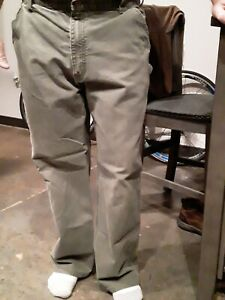

Product Title:  Carhartt mens pants-38 x 32
4485


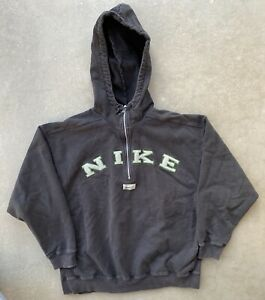

Product Title:  Vintage 90s Nike Hoodie Half Zip Center Swoosh Spellout White Tag XL Travis 
6785


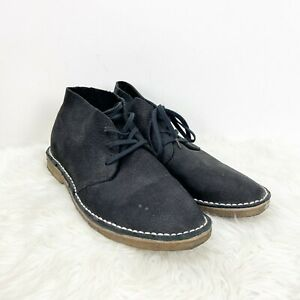

Product Title:  Seavees 12 Mens Black Thunder Tumbled Leather Lace-up Chukka Boots
256


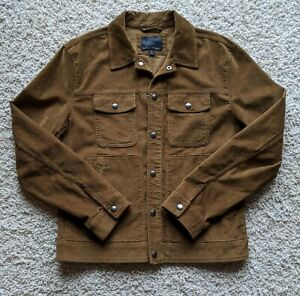

Product Title:  Banana Republic Men's Tan Corduroy Trucker Jacket Medium
2572


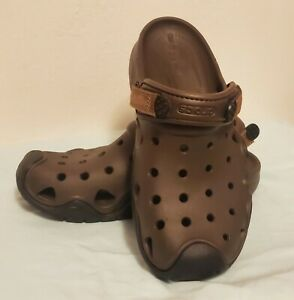

Product Title:  Mens Crocs Size 9 Brown And Black
1745


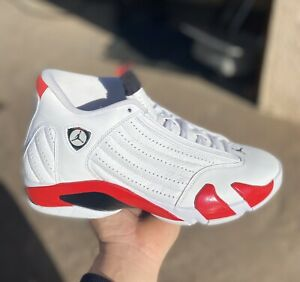

Product Title:  Air Jordan 14 Rip Hamilton
5820


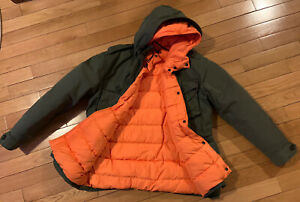

Product Title:  Polo Ralph Lauren Parka Large
2295


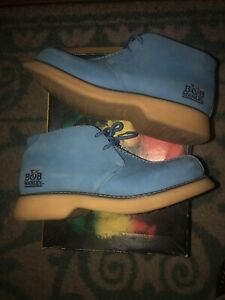

Product Title:  Bob Marley Boots
282


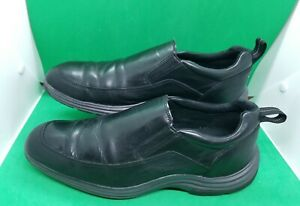

Product Title:  Cole Haan Men's Grand.OS Apron 2 Tone Black Leather Slip On Loafer Shoes Sz 10M
3396


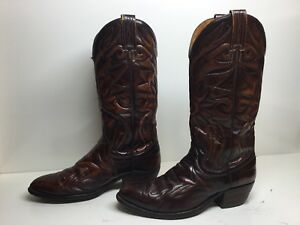

Product Title:  VTG MENS DAN POST COWBOY BURGUNDY BOOTS SIZE 8 D
131


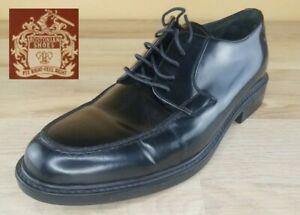

Product Title:  💥Business Oxford BOSTONIAN Strada Italy 13M Black Leather Dress LaceUp Men Shoe
3099


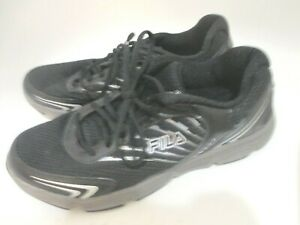

Product Title:  Fila Cool Max Black  Mens Shoes size 11
6060


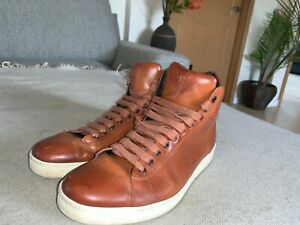

Product Title:  ⭐️ MEN'S TOM FORD TOBACCO  HIGH TOP SNEAKERS  SPORT SHOES   11.5  ⭐️
1631


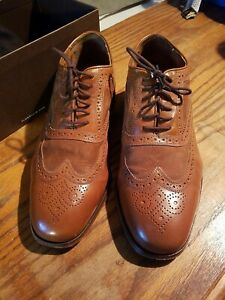

Product Title:  Florsheim Limited Mend 8.5 D Wingtip marlton
2916


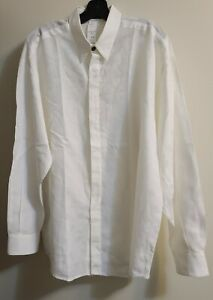

Product Title:  GIANNI VERSACE 100% COTTON WHITE MEDUSA COINS PRINT BUTTON DOWN SHIRT - SIZE 52
777


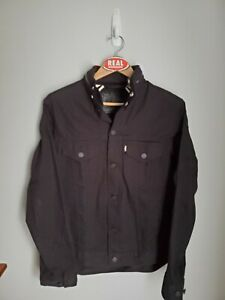

Product Title:  Levi's Commuter Trucker Denim Jacket Men's Small Black Cotton Hooded
1796


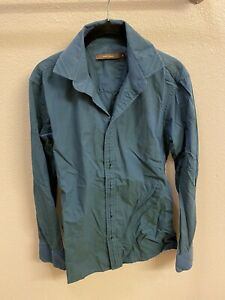

Product Title:  Men’s Shirt Dhruv Segal Medium 
2771


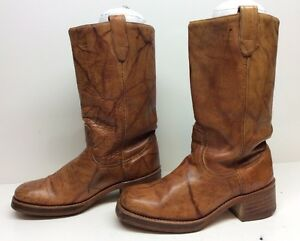

Product Title:  VTG MENS ACME MOTORCYCLE LEATHER BROWN BOOTS SIZE 8 D
81


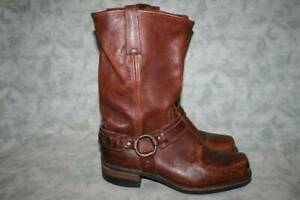

Product Title:  Frye Brown Leather Motorcycle Boots 10M Men
105


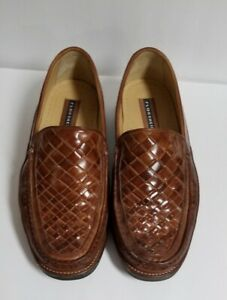

Product Title:  Florsheim Marshall Oak Brown Loafers Size 8 - 3E
3402


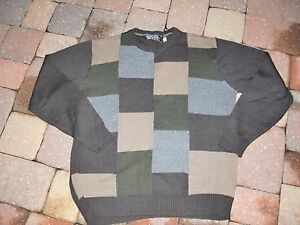

Product Title:  Men's"OSCAR DE LA RENTA"Cotton/A
7185


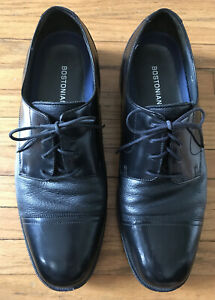

Product Title:  Bostonian Mens Black Cap Toe Lace Shoe Size 10.5 EUC
2955


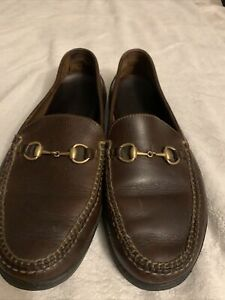

Product Title:  gucci mens shoes size 9
1581


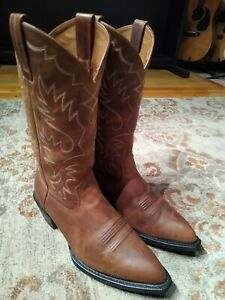

Product Title:  ARIAT HERITAGE BROWN COWHIDE LEATHER J TOE 13" COWBOY BOOTS #35130 MEN'S 9EE
188


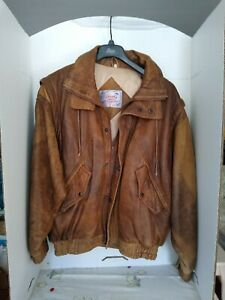

Product Title:  Leather Bomber Jacket Men's Medium Brown Hurricane Hawkins Brand Vintage 
2592


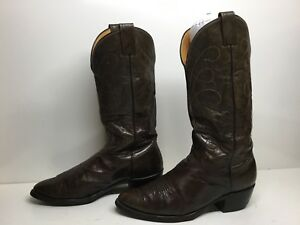

Product Title:  VTG MENS NOCONA COWBOY BROWN BOOTS SIZE 8.5 D
155


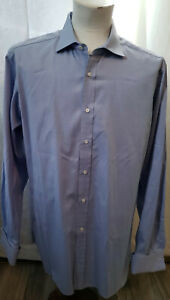

Product Title:  Men's Ralph Lauren Purple Label French cuff shirt Blue size 17 Made in Italy 
1446


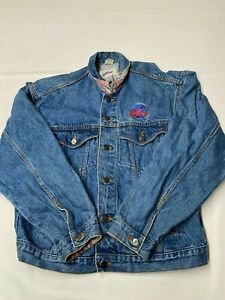

Product Title:  Mens PLANET HOLLYWOOD Vintage Reno Denim Embroidered Trucker Jacket Sz L
2196


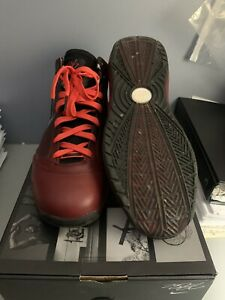

Product Title:  Nike LeBron VII 7 QS Christmas 2019 Size 11
5569


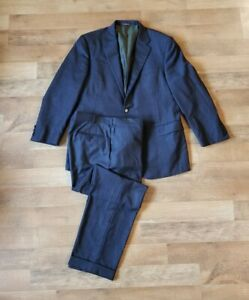

Product Title:  Hickey Freeman x Loro Piana 46 R 36 x 31 grey plaid two piece suit EXCELLENT 
6116


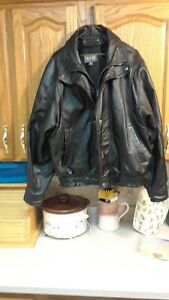

Product Title:  Men’s Vintage WILSONS Black Leather Jacket Medium Size
1933


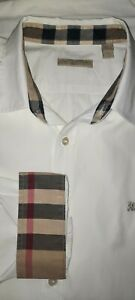

Product Title:  Burberry Brit Mens Henry White Check Cuff Stretch Cotton Shirt  Size XL EUC
335


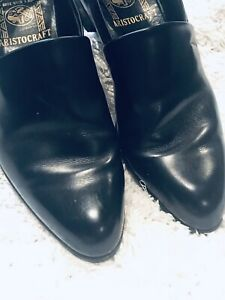

Product Title:  Johnston & Murphy Aristocraft Made In USA Black Calfskin Plain Toe Slip-on Sz 9
3085


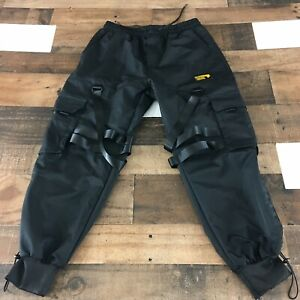

Product Title:  Men’s 11BBS DUSK Straped Cargo Joggers Pants 11 By Boris Bidjan Saberi Sz Medium
4572


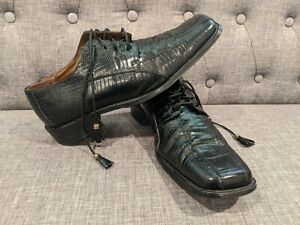

Product Title:  Stacy Adams Men's Oxford Dress Genuine Snake Skin Leather Shoes 11.5 M
3204


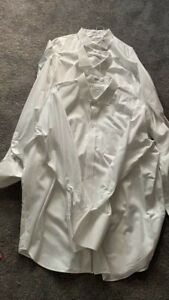

Product Title:  Paul Frederick 18 1/2 - 36, Tailored For White Dress Shirts. French Cuff....
2747


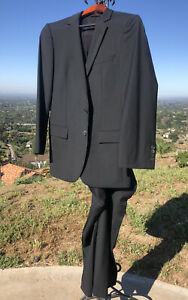

Product Title:  $999 36s 46c EU Hugo Boss Aikonen/Hol Solid Black Two Button Wool Suit Worn ONCE
6488


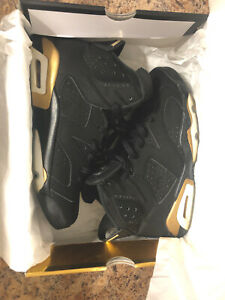

Product Title:  Air jordan Retro 6 2020 Release Og Everything Size 9
5562


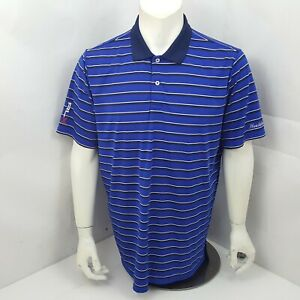

Product Title:  RLX Ralph Lauren Golf Polo Shirt Mens Large Preowned Blue Striped
921


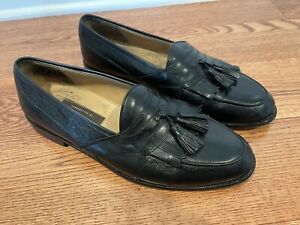

Product Title:  Mens Johnston Murphy Shoes 10.5
3292


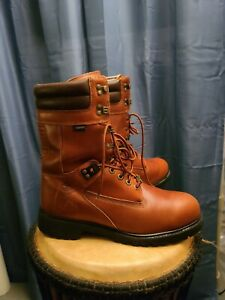

Product Title:  TIMBERLAND WINTER EXTREME GTX SUPER BOOT GORETEX WATER RESISTANT,VIBR
225


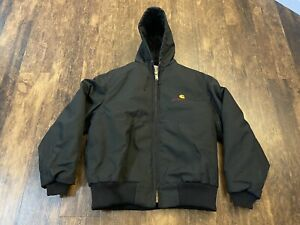

Product Title:  Carhartt J21 Black Hooded Extreme Rugged Quilted Zip Up Jacket Mens Sz L EUC
2352


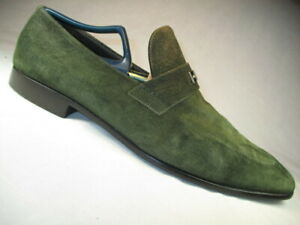

Product Title:  GUCCI Dark Green GENUINE SUEDE, Silver Metal Logo-plate MEN'S LOAFERS Shoe 10.5M
1607


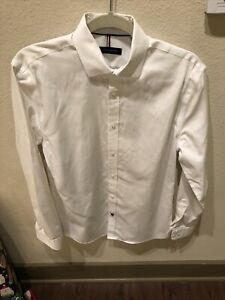

Product Title:  Tommy Hilfiger Mens Dress Shirt 15 32/33 Slim
2744


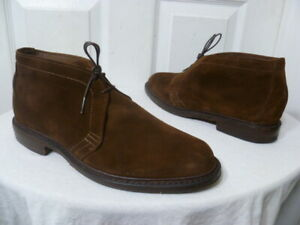

Product Title:  ALLEN EDMONDS x MASSDROP UNLINED BRN SUEDE CHUKKA BOOT MEN US 9½ EEE MADE IN USA
241


In [329]:
rows = mens[['image_link','title']].iloc[indices]

display(Image(url=mens['image_link'].iloc[4], width = 224, height = 224,embed=True))




for indx, row in rows.iterrows():
    display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
    print('Product Title: ', row['title'])
    print(indx)


In [330]:
indices

array([ 224, 1651,   62, 3445,   99,  246, 4391, 2260, 7385, 5701, 6641,
         64,  507, 2316, 2880,  173, 1654, 5095, 3320, 1770,  269, 3276,
       4080, 4374, 3070, 3227, 3189, 3187, 5958,  211, 1667, 6672, 2330,
       5470, 3186, 5564, 2961, 4112, 3073,  157, 1210, 5915, 7184, 2393,
       4871, 3074, 7536,  384, 3352, 1316, 5719, 6318, 1657, 5618, 3202,
       4485, 6785,  256, 2572, 1745, 5820, 2295,  282, 3396,  131, 3099,
       6060, 1631, 2916,  777, 1796, 2771,   81,  105, 3402, 7185, 2955,
       1581,  188, 2592,  155, 1446, 2196, 5569, 6116, 1933,  335, 3085,
       4572, 3204, 2747, 6488, 5562,  921, 3292,  225, 2352, 1607, 2744,
        241])

In [423]:
words = 'work boots'

In [426]:
tfidf = TfidfVectorizer(lowercase=True, tokenizer=None,
                     analyzer='word', max_features=1000)

queryTFIDF = tfidf.fit(mens['tags'])
queryTFIDF = queryTFIDF.transform([words])

cosine_similarities = cosine_similarity(queryTFIDF, document_tfidf_matrix[indices]).flatten()

indices = cosine_similarities.argsort()[:-10:-1]

print(indices)

# print("\n","="*20, "Recommended products", "="*20)

# for i in range(1,len(indices)):
#     rows = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[i]])]
#     for indx, row in rows.iterrows():
#         display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
#         print('Product Title: ', row['title'])

[4 1 5 0 2 6 7 8 3]


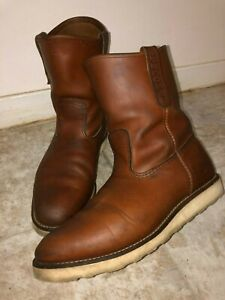

Product Title:  Red Wing 866 Pecos Pull On Work Boots 9 2nds

 ==================== Recommended products ====================


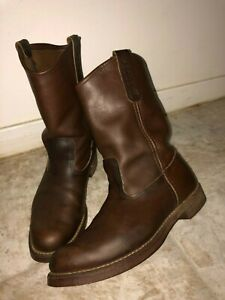

Product Title:  Red Wing 1178 Pecos Pull On Nailseat Western Work Boots 9 


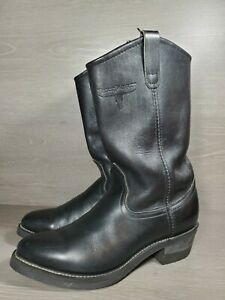

Product Title:  MASON WESTERN Leather Pull On Vibram Sole Cowboy Motorcycle Boots 8.5 (E) (c3


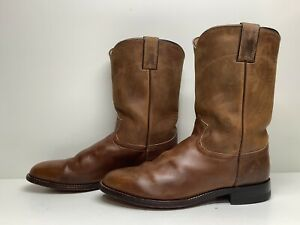

Product Title:  VTG MENS JUSTIN WESTERN ROPER BROWN BOOTS SIZE 8.5 EE


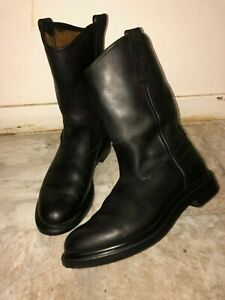

Product Title:  Red Wing 1105 Pecos Black Supersole Pull On Work Boots 9 2nds


In [146]:
def get_similar(product_id, num_results, words=None):
    
    doc_id = Productids.index(product_id)
    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
    
    if words:
        
#         indices = np.argsort(pairwise_dist.flatten())[0:num_results+100]
        
#         print(indices)
        
#         df_ind = []

#         for i in indices:
#             df_ind.append(int(Productids[i]))
        
# #         temp = mens.iloc[df_ind]
        
        tfidf = TfidfVectorizer(lowercase=True, tokenizer=None,
                             analyzer='word', max_features=1000)
        
#         comp_tfidf = tfidf.fit_transform(mens['tags'])
        
        queryTFIDF = tfidf.fit(mens['tags'])
        queryTFIDF = queryTFIDF.transform([words])
        
        cosine_similarities = cosine_similarity(queryTFIDF, document_tfidf_matrix).flatten()
        
        indices = cosine_similarities.argsort()[:-(num_results + 20):-1]
        
        print(indices)
        
        pid = []

        for i in indices:
            pid.append(int(Productids.index(str(i))))
        
        pairwise_dist = pairwise_distances(extracted_features[pid], extracted_features[doc_id].reshape(1,-1))
        
#         print(indices)
        
#         print("\n","="*20, "Recommended products", "="*20)

#         for i in range(1,len(indices)):
#             rows = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[i]])]
#             for indx, row in rows.iterrows():
#                 display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
#                 print('Product Title: ', row['title'])
    
    else:
        indices = np.argsort(pairwise_dist.flatten())[0:num_results]

    
    display(Image(url=mens['image_link'].iloc[int(product_id)], width = 224, height = 224,embed=True))
    
    print('Product Title: ', mens['title'].iloc[int(product_id)])
    
    

    

    print("\n","="*20, "Recommended products", "="*20)

    for i in range(1,len(range(num_results))):
        rows = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[i]])]
        for indx, row in rows.iterrows():
            display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
            print('Product Title: ', row['title'])


get_similar('4', 5)

In [469]:
# get_similar('7830', 5, 't-shirt')

In [202]:
# model = applications.ResNet50(include_top=False, weights='imagenet')

# seq_model = keras.Sequential([model,keras.layers.GlobalAveragePooling2D()])


In [39]:
def model_predict(img_path, model):
    original = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    
    # Convert the PIL image to a numpy array
    # IN PIL - image is in (width, height, channel)
    # In Numpy - image is in (height, width, channel)
    numpy_image = image.img_to_array(original)

    # Convert the image / images into batch format
    # expand_dims will add an extra dimension to the data at a particular axis
    # We want the input matrix to the network to be of the form (batchsize, height, width, channels)
    # Thus we add the extra dimension to the axis 0.
    image_batch = np.expand_dims(numpy_image, axis=0)

    print('PIL image size = ', original.size)
    print('NumPy image size = ', numpy_image.shape)
    print('Batch image  size = ', image_batch.shape)

#     # Be careful how your trained model deals with the input
#     # otherwise, it won't make correct prediction!
#     processed_image = preprocess_input(image_batch, mode='caffe')
    
#     #with graph.as_default():    
        
#     preds = model.predict(processed_image)
    
#     print('Deleting File at Path: ' + img_path)

#     os.remove(img_path)

#     print('Deleting File at Path - Success - ')

    return image_batch

In [151]:
original = '../../../Desktop/test_boot.jpg'

In [152]:
# reconstructed_model = keras.models.load_model('retrainresnet')

# new_model = Model(reconstructed_model.inputs, reconstructed_model.layers[-2].output)

In [153]:
transformed = model_predict(original, new_model)

PIL image size =  (224, 224)
NumPy image size =  (224, 224, 3)
Batch image  size =  (1, 224, 224, 3)


In [154]:
test_feats = new_model.predict(transformed, steps=1, verbose=1, batch_size=1)

1/1 [==============================] - 0s 600us/step


In [155]:
test_feats

np.argsort(pairwise_distances(extracted_features, test_feats.reshape(1,-1)).flatten())

array([2489, 8325, 1002, ...,  647, 7959, 4143])

In [89]:
mens.iloc[2912]

index                                                         476
title           VTG 90’s Columbia 1/2 Zip Parka Hooded Pullove...
price                                                       44.99
currency                                                       US
attributes                                                   coat
image_link      https://i.ebayimg.com/images/g/tjAAAOSwz2Vf4~x...
listing_link    https://www.ebay.com/itm/VTG-90-s-Columbia-1-2...
category                                                     coat
ProductId                                                    2912
tags            l parka 2 colorblock columbia vtg pullover jac...
Name: 2912, dtype: object

In [141]:
# def get_similar_new(original, feats, num_results):
#     pairwise_dist = pairwise_distances(extracted_features, feats.reshape(1,-1))
#     indices = np.argsort(pairwise_dist.flatten())[0:num_results]
#     pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
#     print("="*20, "input product image", "="*20)
    
#     display(Image(original, width = 224, height = 224,embed=True))
    
#     print('Selected Image')

#     print("\n","="*20, "Recommended products", "="*20)
    
#     for i in range(1,len(indices)):
#         rows = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[i]])]
#         for indx, row in rows.iterrows():
#             display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
#             print('Product Title: ', row['title'])
            
def get_similar_new(original, feats, num_results, words=None):
    
    pairwise_dist = pairwise_distances(extracted_features, feats.reshape(1,-1))
    
    if words:
        
#         indices = np.argsort(pairwise_dist.flatten())[0:num_results+100]
        
#         print(indices)
        
#         df_ind = []

#         for i in indices:
#             df_ind.append(int(Productids[i]))
        
# #         temp = mens.iloc[df_ind]
        
        tfidf = TfidfVectorizer(lowercase=True, tokenizer=None,
                             analyzer='word', max_features=1000)
        
#         comp_tfidf = tfidf.fit_transform(mens['tags'])
        
        queryTFIDF = tfidf.fit(mens['tags'])
        queryTFIDF = queryTFIDF.transform([words])
        
        cosine_similarities = cosine_similarity(queryTFIDF, document_tfidf_matrix).flatten()
        
        indices = cosine_similarities.argsort()[:-(num_results + 20):-1]
        
        print(indices)
        
        pid = []

        for i in indices:
            pid.append(int(Productids.index(str(i))))
        
        pairwise_dist = pairwise_distances(extracted_features[pid], feats.reshape(1,-1))
        
#         print(indices)
        
#         print("\n","="*20, "Recommended products", "="*20)

#         for i in range(1,len(indices)):
#             rows = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[i]])]
#             for indx, row in rows.iterrows():
#                 display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
#                 print('Product Title: ', row['title'])
    
#     else:
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]

    
    display(Image(original, width = 224, height = 224,embed=True))
    
    print(indices)

    print(np.argsort(pairwise_dist.flatten()))

    print("Recommended products")

    for i in range(1,len(range(num_results))):
        rows = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[i]])]
        for indx, row in rows.iterrows():
            display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
            print('Product Title: ', row['title'])

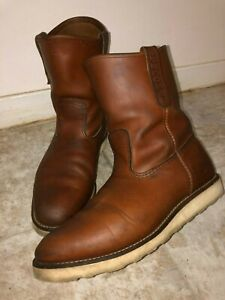

[2489 8325 1002 6747 1342 1947 1503 8284 6808 1030]
[2489 8325 1002 ...  647 7959 4143]

 ==================== Recommended products ====================


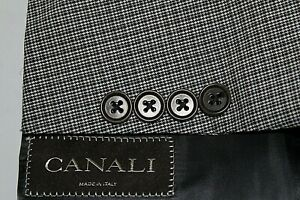

Product Title:  CANALI Made in Italy 56 / 46L Blue White Plaid Wool 2B Dual Vent Blazer Jacket


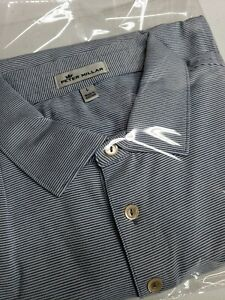

Product Title:  Peter Millar Crown Sport Ease Comfort Mens Large Polo Shirt Heathered Blue Gray


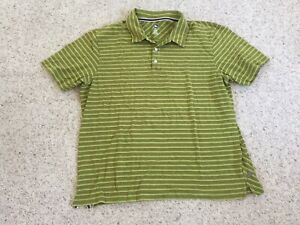

Product Title:  REI Mens Short Sleeve Polo Shirt Size XL Green Striped Casual Cotton Blend


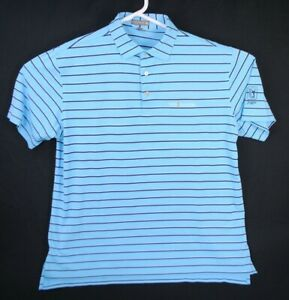

Product Title:  Peter Millar Summer Comfort Stretch Golf Polo Shirt Men’s Size L The Players TPC


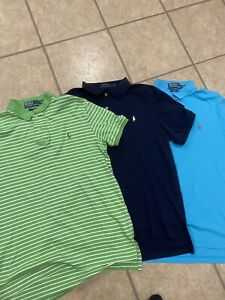

Product Title:  3 Polo Ralph Lauren Pima Soft Touch Polo Shirt Men's Size L


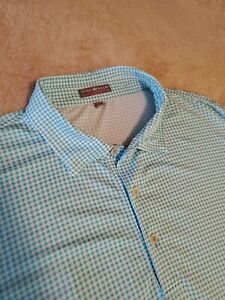

Product Title:  PETER MILLAR Summer Comfort GOLF POLO SHIRT size XL Blue checks Silverleaf


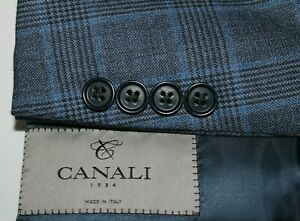

Product Title:  CANALI 1934 Men's US 42L Blue & Black Windowpane Wool Made in Italy Sport Coat


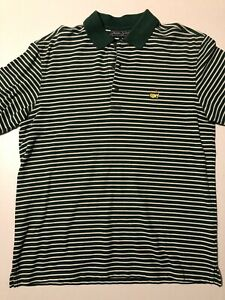

Product Title:  Masters Golf Polo (M)


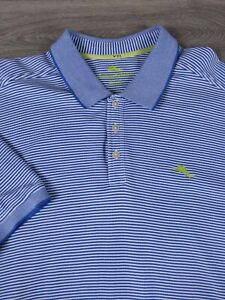

Product Title:  Tommy Bahama Cotton Blue White Striped Golf Polo Shirt Men's Size XXL 


In [156]:
get_similar_new(original, test_feats, 10)

In [78]:
extracted_features[1342]

array([0.00804786, 0.45244676, 0.32162565, ..., 2.222824  , 0.24369471,
       1.7706172 ], dtype=float32)

In [79]:
test_feats.reshape(1,-1)

array([[  0.     ,   0.     , 211.24408, ..., 626.64136,   0.     ,
        166.33313]], dtype=float32)

In [81]:
pairwise_distances(extracted_features[2489].reshape(1,-1), test_feats.reshape(1,-1), metric='cosine')

array([[0.24376947]], dtype=float32)

In [133]:
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


import matplotlib.image as mpimg

In [99]:
neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='ball_tree',
                             metric='euclidean')
neighbors.fit(extracted_features)

NearestNeighbors(algorithm='ball_tree', metric='euclidean')

In [100]:
_, indices = neighbors.kneighbors(test_feats)

In [126]:
list(indices[0])

[2489, 8325, 1002, 6747, 1342]

In [129]:
def similar_images(indices):
    for index in list(indices[0]):
        rows = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[str(index)]])]
        for indx, row in rows.iterrows():
            display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
            print('Product Title: ', row['title'])


In [134]:
pca = PCA(n_components=100)
pca.fit(extracted_features)
compressed_features = pca.transform(extracted_features)

In [135]:
neighbors_pca_features = NearestNeighbors(n_neighbors=5,
                             algorithm='ball_tree',                               
                                metric='euclidean')
neighbors_pca_features.fit(compressed_features)

NearestNeighbors(algorithm='ball_tree', metric='euclidean')

In [139]:
test_img_compressed = pca.transform(test_feats)
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)
print(indices.shape)
indices[0]

(1, 5)


array([2489, 8325, 1002, 6747, 1342])

In [ ]:
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions ***********')
similar_images(indices[0])

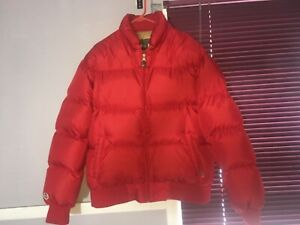

Product Title:  Men’s Polo Jeans Company, Down Jacket, Size Xtra Large...
2489


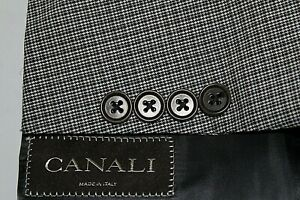

Product Title:  CANALI Made in Italy 56 / 46L Blue White Plaid Wool 2B Dual Vent Blazer Jacket
8325


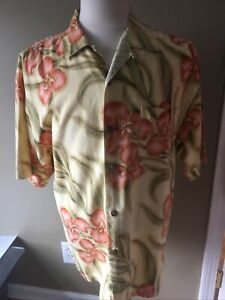

Product Title:  TOMMY BAHAMA 100% Silk yellow orange Short Sleeve HAWAIIAN Floral SHIRT Large 
1002


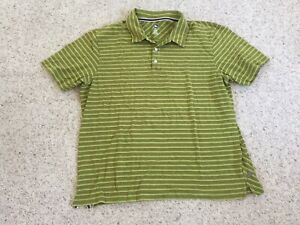

Product Title:  REI Mens Short Sleeve Polo Shirt Size XL Green Striped Casual Cotton Blend
6747


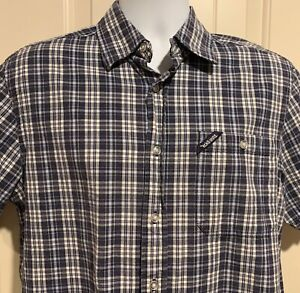

Product Title:  Ecko Unltd. Blue White Plaid Cotton Short Sleeve Shirt - Medium
1342


In [140]:
rows = mens[['image_link','title']].iloc[indices[0]]


for indx, row in rows.iterrows():
    display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
    print('Product Title: ', row['title'])
    print(indx)


In [ ]:
def get_similar_new(original, feats, num_results, words=None):
    
    pairwise_dist = pairwise_distances(extracted_features, feats.reshape(1,-1))
    
    if words:
        
        tfidf = TfidfVectorizer(lowercase=True, tokenizer=None,
                             analyzer='word', max_features=1000)
               
        queryTFIDF = tfidf.fit(mens['tags'])
        queryTFIDF = queryTFIDF.transform([words])
        
        cosine_similarities = cosine_similarity(queryTFIDF, document_tfidf_matrix).flatten()
        
        indices = cosine_similarities.argsort()[:-(num_results + 20):-1]
        
        pid = []

        for i in indices:
            pid.append(int(Productids.index(str(i))))
        
        pairwise_dist = pairwise_distances(extracted_features[pid], feats.reshape(1,-1))
        
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]

    
    display(Image(original, width = 224, height = 224,embed=True))
    
    print(indices)

    print(np.argsort(pairwise_dist.flatten()))

    print("\n","="*20, "Recommended products", "="*20)

    for i in range(1,len(range(num_results))):
        rows = mens[['image_link','title']].loc[mens['ProductId']==int(Productids[indices[i]])]
        for indx, row in rows.iterrows():
            display(Image(url=row['image_link'], width = 224, height = 224,embed=True))
            print('Product Title: ', row['title'])